## Time Series Analysis of NAICS

In [30]:
# import the necessary libraries
import pandas as pd
import re

In [231]:
lmo_detailed_df = pd.read_excel('dataset/LMO_Detailed_Industries_by_NAICS.xlsx')
data_output_df  = pd.read_excel('dataset/Data_Output_Template.xlsx')

merged_df = data_output_df.merge(lmo_detailed_df, on="LMO_Detailed_Industry")
merged_df.NAICS = merged_df.NAICS.astype('str')

In [234]:
print_ = True
rtra_filename = ''
for index, row in merged_df.iterrows():
    naics = row["NAICS"]
    naics_codes = list(map(str.strip, re.split(',|&', naics)))
    year = row['SYEAR']
    month = row['SMTH']
    n_digits = len(naics_codes[0])
    
    if 1997 <= int(year) <= 1999:
        year_range = '97_99'
    elif 2000 <= int(year) <= 2005:
        year_range = '00_05'
    elif 2006 <= int(year) <= 2010:
        year_range = '06_10'
    elif 2011 <= int(year) <= 2015:
        year_range = '11_15'
    elif 2016 <= int(year) <= 2020:
        year_range = '16_20'
    
    # files should be read only when the year cannot be found in the currently opened RTRA file, the following code ensures that
    if index == 0:
        year_range_old, month_old, n_digits_old = year_range, month, n_digits
        
    if index == 0 or (year_range != year_range_old or n_digits != n_digits_old):
        rtra_filename = f"dataset/RTRA_Employ_{n_digits}NAICS_{year_range}.csv"
        rtra_df_ori = pd.read_csv(rtra_filename)
        
    # filter out year and months we are not interested in
    rtra_df = rtra_df_ori.loc[(rtra_df_ori['SYEAR'] == year) & (rtra_df_ori['SMTH'] == month)]
    
    # RTRA file with four digit has different value structure for the NAICS column, it is just the value
    if n_digits != 4:
        rtra_df['naics_code'] = rtra_df.NAICS.str.split(r'\[|\]', expand=True)[1].astype("string")
    else:
        rtra_df['naics_code'] = rtra_df['NAICS'].astype("string")

    year_range_old, n_digits_old = year_range, n_digits
    
    total_employment = 0
    for this_naics_code in naics_codes:
        # get the value from RTRA file using year, month and naics_code
        if rtra_df[ (rtra_df['naics_code'] == this_naics_code) ].shape[0] > 0:
            industry_employment_by_year_month = rtra_df[ (rtra_df['naics_code'] == this_naics_code) ].iloc[0]['_EMPLOYMENT_']
        print(f"industry_employment by_{year}_{month}_code_{this_naics_code}: {industry_employment_by_year_month}")
        total_employment += industry_employment_by_year_month
    # set the total employment count value back in the output template
    merged_df.loc[(merged_df['SYEAR'] == year) & (merged_df['SMTH'] == month) & (merged_df['LMO_Detailed_Industry'] == row['LMO_Detailed_Industry']), 'Employment'] = total_employment

C:\Users\WIN10~1\AppData\Local\Temp/ipykernel_2284/2177531533.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rtra_df['naics_code'] = rtra_df.NAICS.str.split(r'\[|\]', expand=True)[1].astype("string")


industry_employment by_1997_1_code_721: 24000
industry_employment by_1997_2_code_721: 24250
industry_employment by_1997_3_code_721: 27750
industry_employment by_1997_4_code_721: 29750
industry_employment by_1997_5_code_721: 34000
industry_employment by_1997_6_code_721: 40250
industry_employment by_1997_7_code_721: 38500
industry_employment by_1997_8_code_721: 36250
industry_employment by_1997_9_code_721: 31500
industry_employment by_1997_10_code_721: 34000
industry_employment by_1997_11_code_721: 30250
industry_employment by_1997_12_code_721: 30750
industry_employment by_1998_1_code_721: 34000
industry_employment by_1998_2_code_721: 33750
industry_employment by_1998_3_code_721: 32000
industry_employment by_1998_4_code_721: 31250
industry_employment by_1998_5_code_721: 32000
industry_employment by_1998_6_code_721: 35750
industry_employment by_1998_7_code_721: 37000
industry_employment by_1998_8_code_721: 36500
industry_employment by_1998_9_code_721: 38000
industry_employment by_1998_10_

industry_employment by_2013_8_code_721: 45750
industry_employment by_2013_9_code_721: 42750
industry_employment by_2013_10_code_721: 34250
industry_employment by_2013_11_code_721: 37250
industry_employment by_2013_12_code_721: 38500
industry_employment by_2014_1_code_721: 41000
industry_employment by_2014_2_code_721: 40500
industry_employment by_2014_3_code_721: 37500
industry_employment by_2014_4_code_721: 37500
industry_employment by_2014_5_code_721: 31000
industry_employment by_2014_6_code_721: 35000
industry_employment by_2014_7_code_721: 45000
industry_employment by_2014_8_code_721: 42500
industry_employment by_2014_9_code_721: 46750
industry_employment by_2014_10_code_721: 41250
industry_employment by_2014_11_code_721: 37000
industry_employment by_2014_12_code_721: 40000
industry_employment by_2015_1_code_721: 33750
industry_employment by_2015_2_code_721: 31000
industry_employment by_2015_3_code_721: 33250
industry_employment by_2015_4_code_721: 32500
industry_employment by_2015_

industry_employment by_2006_11_code_481: 13500
industry_employment by_2006_12_code_481: 13250
industry_employment by_2007_1_code_481: 15000
industry_employment by_2007_2_code_481: 14000
industry_employment by_2007_3_code_481: 13750
industry_employment by_2007_4_code_481: 15500
industry_employment by_2007_5_code_481: 14000
industry_employment by_2007_6_code_481: 12750
industry_employment by_2007_7_code_481: 12000
industry_employment by_2007_8_code_481: 14500
industry_employment by_2007_9_code_481: 13250
industry_employment by_2007_10_code_481: 13500
industry_employment by_2007_11_code_481: 14000
industry_employment by_2007_12_code_481: 15250
industry_employment by_2008_1_code_481: 13250
industry_employment by_2008_2_code_481: 12250
industry_employment by_2008_3_code_481: 10750
industry_employment by_2008_4_code_481: 10750
industry_employment by_2008_5_code_481: 12500
industry_employment by_2008_6_code_481: 15000
industry_employment by_2008_7_code_481: 13500
industry_employment by_2008_8

industry_employment by_1999_9_code_621: 52250
industry_employment by_1999_10_code_621: 53250
industry_employment by_1999_11_code_621: 55250
industry_employment by_1999_12_code_621: 53750
industry_employment by_2000_1_code_621: 53000
industry_employment by_2000_2_code_621: 53250
industry_employment by_2000_3_code_621: 58500
industry_employment by_2000_4_code_621: 57750
industry_employment by_2000_5_code_621: 57250
industry_employment by_2000_6_code_621: 59250
industry_employment by_2000_7_code_621: 57000
industry_employment by_2000_8_code_621: 52000
industry_employment by_2000_9_code_621: 46000
industry_employment by_2000_10_code_621: 44250
industry_employment by_2000_11_code_621: 46500
industry_employment by_2000_12_code_621: 44750
industry_employment by_2001_1_code_621: 47250
industry_employment by_2001_2_code_621: 47750
industry_employment by_2001_3_code_621: 49500
industry_employment by_2001_4_code_621: 51250
industry_employment by_2001_5_code_621: 53000
industry_employment by_2001_

industry_employment by_2015_10_code_621: 77250
industry_employment by_2015_11_code_621: 81750
industry_employment by_2015_12_code_621: 79750
industry_employment by_2016_1_code_621: 82250
industry_employment by_2016_2_code_621: 82500
industry_employment by_2016_3_code_621: 77500
industry_employment by_2016_4_code_621: 82000
industry_employment by_2016_5_code_621: 78250
industry_employment by_2016_6_code_621: 80000
industry_employment by_2016_7_code_621: 88750
industry_employment by_2016_8_code_621: 79250
industry_employment by_2016_9_code_621: 80500
industry_employment by_2016_10_code_621: 80750
industry_employment by_2016_11_code_621: 79750
industry_employment by_2016_12_code_621: 81500
industry_employment by_2017_1_code_621: 86750
industry_employment by_2017_2_code_621: 81500
industry_employment by_2017_3_code_621: 86750
industry_employment by_2017_4_code_621: 95750
industry_employment by_2017_5_code_621: 100750
industry_employment by_2017_6_code_621: 100500
industry_employment by_201

industry_employment by_2009_5_code_713: 32500
industry_employment by_2009_6_code_713: 37500
industry_employment by_2009_7_code_713: 39500
industry_employment by_2009_8_code_713: 37000
industry_employment by_2009_9_code_713: 31000
industry_employment by_2009_10_code_713: 34750
industry_employment by_2009_11_code_713: 33500
industry_employment by_2009_12_code_713: 35250
industry_employment by_2010_1_code_713: 45500
industry_employment by_2010_2_code_713: 40000
industry_employment by_2010_3_code_713: 36000
industry_employment by_2010_4_code_713: 36250
industry_employment by_2010_5_code_713: 36000
industry_employment by_2010_6_code_713: 31750
industry_employment by_2010_7_code_713: 30000
industry_employment by_2010_8_code_713: 31750
industry_employment by_2010_9_code_713: 28250
industry_employment by_2010_10_code_713: 27500
industry_employment by_2010_11_code_713: 29750
industry_employment by_2010_12_code_713: 30500
industry_employment by_2011_1_code_713: 33750
industry_employment by_2011_

C:\Users\WIN10~1\AppData\Local\Temp/ipykernel_2284/2177531533.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rtra_df['naics_code'] = rtra_df['NAICS'].astype("string")


industry_employment by_1998_2_code_5413: 22500
industry_employment by_1998_3_code_5413: 23000
industry_employment by_1998_4_code_5413: 26500
industry_employment by_1998_5_code_5413: 27000
industry_employment by_1998_6_code_5413: 27750
industry_employment by_1998_7_code_5413: 28250
industry_employment by_1998_8_code_5413: 30000
industry_employment by_1998_9_code_5413: 31000
industry_employment by_1998_10_code_5413: 29000
industry_employment by_1998_11_code_5413: 32750
industry_employment by_1998_12_code_5413: 31000
industry_employment by_1999_1_code_5413: 23500
industry_employment by_1999_2_code_5413: 20750
industry_employment by_1999_3_code_5413: 24250
industry_employment by_1999_4_code_5413: 21500
industry_employment by_1999_5_code_5413: 22250
industry_employment by_1999_6_code_5413: 23250
industry_employment by_1999_7_code_5413: 23750
industry_employment by_1999_8_code_5413: 25000
industry_employment by_1999_9_code_5413: 22000
industry_employment by_1999_10_code_5413: 22000
industry_

industry_employment by_2013_7_code_5413: 47250
industry_employment by_2013_8_code_5413: 48750
industry_employment by_2013_9_code_5413: 50250
industry_employment by_2013_10_code_5413: 43250
industry_employment by_2013_11_code_5413: 38750
industry_employment by_2013_12_code_5413: 38500
industry_employment by_2014_1_code_5413: 37250
industry_employment by_2014_2_code_5413: 37000
industry_employment by_2014_3_code_5413: 37250
industry_employment by_2014_4_code_5413: 35250
industry_employment by_2014_5_code_5413: 33750
industry_employment by_2014_6_code_5413: 32500
industry_employment by_2014_7_code_5413: 32750
industry_employment by_2014_8_code_5413: 36500
industry_employment by_2014_9_code_5413: 35250
industry_employment by_2014_10_code_5413: 32250
industry_employment by_2014_11_code_5413: 31000
industry_employment by_2014_12_code_5413: 39750
industry_employment by_2015_1_code_5413: 41500
industry_employment by_2015_2_code_5413: 38750
industry_employment by_2015_3_code_5413: 37000
industr

industry_employment by_2000_2_code_518: 750
industry_employment by_2000_2_code_519: 2500
industry_employment by_2000_3_code_515: 5250
industry_employment by_2000_3_code_518: 750
industry_employment by_2000_3_code_519: 3000
industry_employment by_2000_4_code_515: 6250
industry_employment by_2000_4_code_518: 250
industry_employment by_2000_4_code_519: 2000
industry_employment by_2000_5_code_515: 4250
industry_employment by_2000_5_code_518: 250
industry_employment by_2000_5_code_519: 2500
industry_employment by_2000_6_code_515: 4000
industry_employment by_2000_6_code_518: 1500
industry_employment by_2000_6_code_519: 2750
industry_employment by_2000_7_code_515: 3250
industry_employment by_2000_7_code_518: 1750
industry_employment by_2000_7_code_519: 4500
industry_employment by_2000_8_code_515: 1750
industry_employment by_2000_8_code_518: 2250
industry_employment by_2000_8_code_519: 4000
industry_employment by_2000_9_code_515: 1000
industry_employment by_2000_9_code_518: 2000
industry_emplo

industry_employment by_2005_11_code_518: 2500
industry_employment by_2005_11_code_519: 6250
industry_employment by_2005_12_code_515: 2500
industry_employment by_2005_12_code_518: 2250
industry_employment by_2005_12_code_519: 5250
industry_employment by_2006_1_code_515: 3250
industry_employment by_2006_1_code_518: 2000
industry_employment by_2006_1_code_519: 4000
industry_employment by_2006_2_code_515: 3500
industry_employment by_2006_2_code_518: 1500
industry_employment by_2006_2_code_519: 3750
industry_employment by_2006_3_code_515: 2750
industry_employment by_2006_3_code_518: 500
industry_employment by_2006_3_code_519: 3000
industry_employment by_2006_4_code_515: 3000
industry_employment by_2006_4_code_518: 1000
industry_employment by_2006_4_code_519: 2500
industry_employment by_2006_5_code_515: 4250
industry_employment by_2006_5_code_518: 1250
industry_employment by_2006_5_code_519: 2750
industry_employment by_2006_6_code_515: 4500
industry_employment by_2006_6_code_518: 750
industr

industry_employment by_2011_10_code_518: 750
industry_employment by_2011_10_code_519: 5500
industry_employment by_2011_11_code_515: 3250
industry_employment by_2011_11_code_518: 750
industry_employment by_2011_11_code_519: 2500
industry_employment by_2011_12_code_515: 3750
industry_employment by_2011_12_code_518: 500
industry_employment by_2011_12_code_519: 4000
industry_employment by_2012_1_code_515: 4500
industry_employment by_2012_1_code_518: 500
industry_employment by_2012_1_code_519: 4500
industry_employment by_2012_2_code_515: 4250
industry_employment by_2012_2_code_518: 1250
industry_employment by_2012_2_code_519: 3750
industry_employment by_2012_3_code_515: 2250
industry_employment by_2012_3_code_518: 250
industry_employment by_2012_3_code_519: 4250
industry_employment by_2012_4_code_515: 3750
industry_employment by_2012_4_code_518: 1250
industry_employment by_2012_4_code_519: 3750
industry_employment by_2012_5_code_515: 2500
industry_employment by_2012_5_code_518: 500
industry

industry_employment by_2017_9_code_518: 750
industry_employment by_2017_9_code_519: 4250
industry_employment by_2017_10_code_515: 500
industry_employment by_2017_10_code_518: 1500
industry_employment by_2017_10_code_519: 5500
industry_employment by_2017_11_code_515: 750
industry_employment by_2017_11_code_518: 1000
industry_employment by_2017_11_code_519: 4750
industry_employment by_2017_12_code_515: 750
industry_employment by_2017_12_code_518: 1500
industry_employment by_2017_12_code_519: 3500
industry_employment by_2018_1_code_515: 500
industry_employment by_2018_1_code_518: 1000
industry_employment by_2018_1_code_519: 3250
industry_employment by_2018_2_code_515: 1000
industry_employment by_2018_2_code_518: 1750
industry_employment by_2018_2_code_519: 3750
industry_employment by_2018_3_code_515: 500
industry_employment by_2018_3_code_518: 750
industry_employment by_2018_3_code_519: 3750
industry_employment by_2018_4_code_515: 2000
industry_employment by_2018_4_code_518: 1000
industry

industry_employment by_2003_10_code_56: 82250
industry_employment by_2003_11_code_55: 0
industry_employment by_2003_11_code_56: 80250
industry_employment by_2003_12_code_55: 0
industry_employment by_2003_12_code_56: 79250
industry_employment by_2004_1_code_55: 0
industry_employment by_2004_1_code_56: 74000
industry_employment by_2004_2_code_55: 0
industry_employment by_2004_2_code_56: 75000
industry_employment by_2004_3_code_55: 0
industry_employment by_2004_3_code_56: 76000
industry_employment by_2004_4_code_55: 0
industry_employment by_2004_4_code_56: 74750
industry_employment by_2004_5_code_55: 0
industry_employment by_2004_5_code_56: 84250
industry_employment by_2004_6_code_55: 0
industry_employment by_2004_6_code_56: 83500
industry_employment by_2004_7_code_55: 0
industry_employment by_2004_7_code_56: 86000
industry_employment by_2004_8_code_55: 0
industry_employment by_2004_8_code_56: 84750
industry_employment by_2004_9_code_55: 0
industry_employment by_2004_9_code_56: 78750
indu

industry_employment by_2012_3_code_55: 500
industry_employment by_2012_3_code_56: 89500
industry_employment by_2012_4_code_55: 500
industry_employment by_2012_4_code_56: 92250
industry_employment by_2012_5_code_55: 750
industry_employment by_2012_5_code_56: 97000
industry_employment by_2012_6_code_55: 500
industry_employment by_2012_6_code_56: 101000
industry_employment by_2012_7_code_55: 250
industry_employment by_2012_7_code_56: 104000
industry_employment by_2012_8_code_55: 250
industry_employment by_2012_8_code_56: 106250
industry_employment by_2012_9_code_55: 0
industry_employment by_2012_9_code_56: 100250
industry_employment by_2012_10_code_55: 0
industry_employment by_2012_10_code_56: 103000
industry_employment by_2012_11_code_55: 0
industry_employment by_2012_11_code_56: 99500
industry_employment by_2012_12_code_55: 0
industry_employment by_2012_12_code_56: 101500
industry_employment by_2013_1_code_55: 0
industry_employment by_2013_1_code_56: 100000
industry_employment by_2013_2

industry_employment by_1998_11_code_6112: 9750
industry_employment by_1998_12_code_6112: 9000
industry_employment by_1999_1_code_6112: 11750
industry_employment by_1999_2_code_6112: 14000
industry_employment by_1999_3_code_6112: 12500
industry_employment by_1999_4_code_6112: 15000
industry_employment by_1999_5_code_6112: 13250
industry_employment by_1999_6_code_6112: 13000
industry_employment by_1999_7_code_6112: 12750
industry_employment by_1999_8_code_6112: 14000
industry_employment by_1999_9_code_6112: 17500
industry_employment by_1999_10_code_6112: 14750
industry_employment by_1999_11_code_6112: 17500
industry_employment by_1999_12_code_6112: 18500
industry_employment by_2000_1_code_6112: 15000
industry_employment by_2000_2_code_6112: 15500
industry_employment by_2000_3_code_6112: 14500
industry_employment by_2000_4_code_6112: 12000
industry_employment by_2000_5_code_6112: 12250
industry_employment by_2000_6_code_6112: 12750
industry_employment by_2000_7_code_6112: 12750
industry_e

industry_employment by_2013_10_code_6112: 15250
industry_employment by_2013_11_code_6112: 12750
industry_employment by_2013_12_code_6112: 8750
industry_employment by_2014_1_code_6112: 10750
industry_employment by_2014_2_code_6112: 10750
industry_employment by_2014_3_code_6112: 11250
industry_employment by_2014_4_code_6112: 11250
industry_employment by_2014_5_code_6112: 9750
industry_employment by_2014_6_code_6112: 13250
industry_employment by_2014_7_code_6112: 13750
industry_employment by_2014_8_code_6112: 13000
industry_employment by_2014_9_code_6112: 16500
industry_employment by_2014_10_code_6112: 15250
industry_employment by_2014_11_code_6112: 14750
industry_employment by_2014_12_code_6112: 13250
industry_employment by_2015_1_code_6112: 13750
industry_employment by_2015_2_code_6112: 13250
industry_employment by_2015_3_code_6112: 14250
industry_employment by_2015_4_code_6112: 11250
industry_employment by_2015_5_code_6112: 9750
industry_employment by_2015_6_code_6112: 7750
industry_em

industry_employment by_2008_2_code_5415: 33500
industry_employment by_2008_3_code_5415: 32000
industry_employment by_2008_4_code_5415: 30250
industry_employment by_2008_5_code_5415: 29750
industry_employment by_2008_6_code_5415: 31250
industry_employment by_2008_7_code_5415: 31000
industry_employment by_2008_8_code_5415: 30000
industry_employment by_2008_9_code_5415: 29000
industry_employment by_2008_10_code_5415: 30250
industry_employment by_2008_11_code_5415: 28750
industry_employment by_2008_12_code_5415: 26750
industry_employment by_2009_1_code_5415: 33000
industry_employment by_2009_2_code_5415: 36750
industry_employment by_2009_3_code_5415: 40750
industry_employment by_2009_4_code_5415: 36750
industry_employment by_2009_5_code_5415: 36750
industry_employment by_2009_6_code_5415: 34250
industry_employment by_2009_7_code_5415: 31250
industry_employment by_2009_8_code_5415: 29500
industry_employment by_2009_9_code_5415: 23750
industry_employment by_2009_10_code_5415: 24750
industry_

industry_employment by_2000_11_code_23: 111000
industry_employment by_2000_12_code_23: 107000
industry_employment by_2001_1_code_23: 97250
industry_employment by_2001_2_code_23: 103500
industry_employment by_2001_3_code_23: 108250
industry_employment by_2001_4_code_23: 111000
industry_employment by_2001_5_code_23: 116500
industry_employment by_2001_6_code_23: 122000
industry_employment by_2001_7_code_23: 128500
industry_employment by_2001_8_code_23: 121500
industry_employment by_2001_9_code_23: 115250
industry_employment by_2001_10_code_23: 114250
industry_employment by_2001_11_code_23: 108500
industry_employment by_2001_12_code_23: 100750
industry_employment by_2002_1_code_23: 107250
industry_employment by_2002_2_code_23: 106250
industry_employment by_2002_3_code_23: 105750
industry_employment by_2002_4_code_23: 107750
industry_employment by_2002_5_code_23: 115250
industry_employment by_2002_6_code_23: 118750
industry_employment by_2002_7_code_23: 128250
industry_employment by_2002_8_

industry_employment by_2016_11_code_23: 217000
industry_employment by_2016_12_code_23: 210250
industry_employment by_2017_1_code_23: 213500
industry_employment by_2017_2_code_23: 221500
industry_employment by_2017_3_code_23: 218250
industry_employment by_2017_4_code_23: 223000
industry_employment by_2017_5_code_23: 227500
industry_employment by_2017_6_code_23: 236500
industry_employment by_2017_7_code_23: 239250
industry_employment by_2017_8_code_23: 237250
industry_employment by_2017_9_code_23: 229000
industry_employment by_2017_10_code_23: 229500
industry_employment by_2017_11_code_23: 237250
industry_employment by_2017_12_code_23: 230750
industry_employment by_2018_1_code_23: 239750
industry_employment by_2018_2_code_23: 238000
industry_employment by_2018_3_code_23: 236750
industry_employment by_2018_4_code_23: 238750
industry_employment by_2018_5_code_23: 236000
industry_employment by_2018_6_code_23: 236250
industry_employment by_2018_7_code_23: 239750
industry_employment by_2018_8

industry_employment by_2009_9_code_6111: 80500
industry_employment by_2009_10_code_6111: 78500
industry_employment by_2009_11_code_6111: 83500
industry_employment by_2009_12_code_6111: 82250
industry_employment by_2010_1_code_6111: 88500
industry_employment by_2010_2_code_6111: 89500
industry_employment by_2010_3_code_6111: 83750
industry_employment by_2010_4_code_6111: 87750
industry_employment by_2010_5_code_6111: 90000
industry_employment by_2010_6_code_6111: 94750
industry_employment by_2010_7_code_6111: 66000
industry_employment by_2010_8_code_6111: 66500
industry_employment by_2010_9_code_6111: 85250
industry_employment by_2010_10_code_6111: 84500
industry_employment by_2010_11_code_6111: 82250
industry_employment by_2010_12_code_6111: 83000
industry_employment by_2011_1_code_6111: 85250
industry_employment by_2011_2_code_6111: 85250
industry_employment by_2011_3_code_6111: 80000
industry_employment by_2011_4_code_6111: 88750
industry_employment by_2011_5_code_6111: 89500
industr

industry_employment by_2002_5_code_332: 14500
industry_employment by_2002_6_code_332: 13250
industry_employment by_2002_7_code_332: 14500
industry_employment by_2002_8_code_332: 13750
industry_employment by_2002_9_code_332: 11750
industry_employment by_2002_10_code_332: 13000
industry_employment by_2002_11_code_332: 14250
industry_employment by_2002_12_code_332: 14250
industry_employment by_2003_1_code_332: 13750
industry_employment by_2003_2_code_332: 12500
industry_employment by_2003_3_code_332: 14250
industry_employment by_2003_4_code_332: 14500
industry_employment by_2003_5_code_332: 15000
industry_employment by_2003_6_code_332: 15750
industry_employment by_2003_7_code_332: 16250
industry_employment by_2003_8_code_332: 15750
industry_employment by_2003_9_code_332: 14000
industry_employment by_2003_10_code_332: 10250
industry_employment by_2003_11_code_332: 11000
industry_employment by_2003_12_code_332: 12500
industry_employment by_2004_1_code_332: 11500
industry_employment by_2004_

industry_employment by_2018_7_code_332: 9750
industry_employment by_2018_8_code_332: 12250
industry_employment by_2018_9_code_332: 14250
industry_employment by_2018_10_code_332: 10500
industry_employment by_2018_11_code_332: 15000
industry_employment by_2018_12_code_332: 10750
industry_employment by_1997_1_code_111: 8750
industry_employment by_1997_1_code_112: 13500
industry_employment by_1997_2_code_111: 9750
industry_employment by_1997_2_code_112: 14000
industry_employment by_1997_3_code_111: 10500
industry_employment by_1997_3_code_112: 13250
industry_employment by_1997_4_code_111: 10500
industry_employment by_1997_4_code_112: 15000
industry_employment by_1997_5_code_111: 12000
industry_employment by_1997_5_code_112: 15500
industry_employment by_1997_6_code_111: 16500
industry_employment by_1997_6_code_112: 17250
industry_employment by_1997_7_code_111: 18750
industry_employment by_1997_7_code_112: 17500
industry_employment by_1997_8_code_111: 19250
industry_employment by_1997_8_code

industry_employment by_2004_3_code_112: 12750
industry_employment by_2004_4_code_111: 21000
industry_employment by_2004_4_code_112: 11750
industry_employment by_2004_5_code_111: 23750
industry_employment by_2004_5_code_112: 13250
industry_employment by_2004_6_code_111: 27500
industry_employment by_2004_6_code_112: 12750
industry_employment by_2004_7_code_111: 27750
industry_employment by_2004_7_code_112: 12000
industry_employment by_2004_8_code_111: 24750
industry_employment by_2004_8_code_112: 13500
industry_employment by_2004_9_code_111: 21000
industry_employment by_2004_9_code_112: 9750
industry_employment by_2004_10_code_111: 21000
industry_employment by_2004_10_code_112: 10750
industry_employment by_2004_11_code_111: 17000
industry_employment by_2004_11_code_112: 8750
industry_employment by_2004_12_code_111: 17500
industry_employment by_2004_12_code_112: 9750
industry_employment by_2005_1_code_111: 15500
industry_employment by_2005_1_code_112: 12000
industry_employment by_2005_2_c

industry_employment by_2011_11_code_112: 8250
industry_employment by_2011_12_code_111: 12250
industry_employment by_2011_12_code_112: 10250
industry_employment by_2012_1_code_111: 8250
industry_employment by_2012_1_code_112: 11000
industry_employment by_2012_2_code_111: 6500
industry_employment by_2012_2_code_112: 9500
industry_employment by_2012_3_code_111: 11000
industry_employment by_2012_3_code_112: 9500
industry_employment by_2012_4_code_111: 12750
industry_employment by_2012_4_code_112: 9250
industry_employment by_2012_5_code_111: 11500
industry_employment by_2012_5_code_112: 9000
industry_employment by_2012_6_code_111: 11500
industry_employment by_2012_6_code_112: 9250
industry_employment by_2012_7_code_111: 12000
industry_employment by_2012_7_code_112: 8500
industry_employment by_2012_8_code_111: 14750
industry_employment by_2012_8_code_112: 8750
industry_employment by_2012_9_code_111: 13500
industry_employment by_2012_9_code_112: 10750
industry_employment by_2012_10_code_111: 

industry_employment by_1998_9_code_911: 28500
industry_employment by_1998_10_code_911: 27500
industry_employment by_1998_11_code_911: 32000
industry_employment by_1998_12_code_911: 30500
industry_employment by_1999_1_code_911: 34500
industry_employment by_1999_2_code_911: 34000
industry_employment by_1999_3_code_911: 33750
industry_employment by_1999_4_code_911: 33250
industry_employment by_1999_5_code_911: 31500
industry_employment by_1999_6_code_911: 29250
industry_employment by_1999_7_code_911: 28750
industry_employment by_1999_8_code_911: 33750
industry_employment by_1999_9_code_911: 34000
industry_employment by_1999_10_code_911: 32750
industry_employment by_1999_11_code_911: 31250
industry_employment by_1999_12_code_911: 35000
industry_employment by_2000_1_code_911: 38250
industry_employment by_2000_2_code_911: 37250
industry_employment by_2000_3_code_911: 30000
industry_employment by_2000_4_code_911: 32000
industry_employment by_2000_5_code_911: 31250
industry_employment by_2000_

industry_employment by_2015_4_code_911: 35250
industry_employment by_2015_5_code_911: 33250
industry_employment by_2015_6_code_911: 32000
industry_employment by_2015_7_code_911: 35500
industry_employment by_2015_8_code_911: 35000
industry_employment by_2015_9_code_911: 36000
industry_employment by_2015_10_code_911: 36750
industry_employment by_2015_11_code_911: 32500
industry_employment by_2015_12_code_911: 34500
industry_employment by_2016_1_code_911: 33250
industry_employment by_2016_2_code_911: 33500
industry_employment by_2016_3_code_911: 35500
industry_employment by_2016_4_code_911: 35750
industry_employment by_2016_5_code_911: 38500
industry_employment by_2016_6_code_911: 39250
industry_employment by_2016_7_code_911: 34500
industry_employment by_2016_8_code_911: 39500
industry_employment by_2016_9_code_911: 38250
industry_employment by_2016_10_code_911: 41250
industry_employment by_2016_11_code_911: 38000
industry_employment by_2016_12_code_911: 35250
industry_employment by_2017_

industry_employment by_2001_2_code_521: 0
industry_employment by_2001_2_code_522: 43250
industry_employment by_2001_2_code_523: 43250
industry_employment by_2001_2_code_526: 0
industry_employment by_2001_3_code_521: 0
industry_employment by_2001_3_code_522: 38500
industry_employment by_2001_3_code_523: 38500
industry_employment by_2001_3_code_526: 0
industry_employment by_2001_4_code_521: 0
industry_employment by_2001_4_code_522: 43750
industry_employment by_2001_4_code_523: 43750
industry_employment by_2001_4_code_526: 0
industry_employment by_2001_5_code_521: 0
industry_employment by_2001_5_code_522: 39250
industry_employment by_2001_5_code_523: 39250
industry_employment by_2001_5_code_526: 0
industry_employment by_2001_6_code_521: 0
industry_employment by_2001_6_code_522: 43750
industry_employment by_2001_6_code_523: 43750
industry_employment by_2001_6_code_526: 0
industry_employment by_2001_7_code_521: 0
industry_employment by_2001_7_code_522: 40500
industry_employment by_2001_7_co

industry_employment by_2005_3_code_521: 0
industry_employment by_2005_3_code_522: 49750
industry_employment by_2005_3_code_523: 49750
industry_employment by_2005_3_code_526: 0
industry_employment by_2005_4_code_521: 0
industry_employment by_2005_4_code_522: 45250
industry_employment by_2005_4_code_523: 45250
industry_employment by_2005_4_code_526: 500
industry_employment by_2005_5_code_521: 500
industry_employment by_2005_5_code_522: 48500
industry_employment by_2005_5_code_523: 48500
industry_employment by_2005_5_code_526: 0
industry_employment by_2005_6_code_521: 0
industry_employment by_2005_6_code_522: 48750
industry_employment by_2005_6_code_523: 48750
industry_employment by_2005_6_code_526: 0
industry_employment by_2005_7_code_521: 0
industry_employment by_2005_7_code_522: 48500
industry_employment by_2005_7_code_523: 48500
industry_employment by_2005_7_code_526: 0
industry_employment by_2005_8_code_521: 0
industry_employment by_2005_8_code_522: 48750
industry_employment by_2005_

industry_employment by_2009_8_code_522: 39250
industry_employment by_2009_8_code_523: 39250
industry_employment by_2009_8_code_526: 0
industry_employment by_2009_9_code_521: 0
industry_employment by_2009_9_code_522: 38250
industry_employment by_2009_9_code_523: 38250
industry_employment by_2009_9_code_526: 0
industry_employment by_2009_10_code_521: 0
industry_employment by_2009_10_code_522: 40250
industry_employment by_2009_10_code_523: 40250
industry_employment by_2009_10_code_526: 0
industry_employment by_2009_11_code_521: 0
industry_employment by_2009_11_code_522: 43000
industry_employment by_2009_11_code_523: 43000
industry_employment by_2009_11_code_526: 0
industry_employment by_2009_12_code_521: 0
industry_employment by_2009_12_code_522: 50500
industry_employment by_2009_12_code_523: 50500
industry_employment by_2009_12_code_526: 0
industry_employment by_2010_1_code_521: 0
industry_employment by_2010_1_code_522: 46000
industry_employment by_2010_1_code_523: 46000
industry_employm

industry_employment by_2014_5_code_522: 40750
industry_employment by_2014_5_code_523: 40750
industry_employment by_2014_5_code_526: 0
industry_employment by_2014_6_code_521: 0
industry_employment by_2014_6_code_522: 40750
industry_employment by_2014_6_code_523: 40750
industry_employment by_2014_6_code_526: 0
industry_employment by_2014_7_code_521: 0
industry_employment by_2014_7_code_522: 46500
industry_employment by_2014_7_code_523: 46500
industry_employment by_2014_7_code_526: 0
industry_employment by_2014_8_code_521: 0
industry_employment by_2014_8_code_522: 50250
industry_employment by_2014_8_code_523: 50250
industry_employment by_2014_8_code_526: 0
industry_employment by_2014_9_code_521: 0
industry_employment by_2014_9_code_522: 43750
industry_employment by_2014_9_code_523: 43750
industry_employment by_2014_9_code_526: 0
industry_employment by_2014_10_code_521: 0
industry_employment by_2014_10_code_522: 48000
industry_employment by_2014_10_code_523: 48000
industry_employment by_20

industry_employment by_1997_2_code_114: 4500
industry_employment by_1997_3_code_114: 5750
industry_employment by_1997_4_code_114: 3500
industry_employment by_1997_5_code_114: 6000
industry_employment by_1997_6_code_114: 8250
industry_employment by_1997_7_code_114: 8750
industry_employment by_1997_8_code_114: 8250
industry_employment by_1997_9_code_114: 6250
industry_employment by_1997_10_code_114: 5250
industry_employment by_1997_11_code_114: 2500
industry_employment by_1997_12_code_114: 2250
industry_employment by_1998_1_code_114: 2750
industry_employment by_1998_2_code_114: 2250
industry_employment by_1998_3_code_114: 3500
industry_employment by_1998_4_code_114: 4000
industry_employment by_1998_5_code_114: 4500
industry_employment by_1998_6_code_114: 3250
industry_employment by_1998_7_code_114: 4250
industry_employment by_1998_8_code_114: 5000
industry_employment by_1998_9_code_114: 3750
industry_employment by_1998_10_code_114: 3750
industry_employment by_1998_11_code_114: 2000
indus

industry_employment by_2013_9_code_114: 1750
industry_employment by_2013_10_code_114: 750
industry_employment by_2013_11_code_114: 500
industry_employment by_2013_12_code_114: 500
industry_employment by_2014_1_code_114: 1750
industry_employment by_2014_2_code_114: 1250
industry_employment by_2014_3_code_114: 1000
industry_employment by_2014_4_code_114: 2250
industry_employment by_2014_5_code_114: 1750
industry_employment by_2014_6_code_114: 4250
industry_employment by_2014_7_code_114: 1250
industry_employment by_2014_8_code_114: 2500
industry_employment by_2014_9_code_114: 2750
industry_employment by_2014_10_code_114: 2250
industry_employment by_2014_11_code_114: 1500
industry_employment by_2014_12_code_114: 1750
industry_employment by_2015_1_code_114: 3000
industry_employment by_2015_2_code_114: 2250
industry_employment by_2015_3_code_114: 1500
industry_employment by_2015_4_code_114: 1750
industry_employment by_2015_5_code_114: 1750
industry_employment by_2015_6_code_114: 2000
industr

industry_employment by_2007_3_code_722: 131500
industry_employment by_2007_4_code_722: 128000
industry_employment by_2007_5_code_722: 130500
industry_employment by_2007_6_code_722: 140000
industry_employment by_2007_7_code_722: 135000
industry_employment by_2007_8_code_722: 143750
industry_employment by_2007_9_code_722: 134500
industry_employment by_2007_10_code_722: 136000
industry_employment by_2007_11_code_722: 133750
industry_employment by_2007_12_code_722: 127000
industry_employment by_2008_1_code_722: 127250
industry_employment by_2008_2_code_722: 129500
industry_employment by_2008_3_code_722: 135000
industry_employment by_2008_4_code_722: 139250
industry_employment by_2008_5_code_722: 140500
industry_employment by_2008_6_code_722: 140750
industry_employment by_2008_7_code_722: 137500
industry_employment by_2008_8_code_722: 137500
industry_employment by_2008_9_code_722: 136750
industry_employment by_2008_10_code_722: 135250
industry_employment by_2008_11_code_722: 130750
industry

industry_employment by_1998_8_code_312: 3750
industry_employment by_1998_9_code_311: 20500
industry_employment by_1998_9_code_312: 4000
industry_employment by_1998_10_code_311: 21750
industry_employment by_1998_10_code_312: 3250
industry_employment by_1998_11_code_311: 23500
industry_employment by_1998_11_code_312: 3750
industry_employment by_1998_12_code_311: 19500
industry_employment by_1998_12_code_312: 4000
industry_employment by_1999_1_code_311: 17500
industry_employment by_1999_1_code_312: 4500
industry_employment by_1999_2_code_311: 18500
industry_employment by_1999_2_code_312: 4250
industry_employment by_1999_3_code_311: 17250
industry_employment by_1999_3_code_312: 3250
industry_employment by_1999_4_code_311: 17000
industry_employment by_1999_4_code_312: 3750
industry_employment by_1999_5_code_311: 17500
industry_employment by_1999_5_code_312: 2500
industry_employment by_1999_6_code_311: 16250
industry_employment by_1999_6_code_312: 5000
industry_employment by_1999_7_code_311:

industry_employment by_2006_5_code_312: 4500
industry_employment by_2006_6_code_311: 16750
industry_employment by_2006_6_code_312: 5000
industry_employment by_2006_7_code_311: 16500
industry_employment by_2006_7_code_312: 4500
industry_employment by_2006_8_code_311: 16750
industry_employment by_2006_8_code_312: 3250
industry_employment by_2006_9_code_311: 20250
industry_employment by_2006_9_code_312: 2750
industry_employment by_2006_10_code_311: 20500
industry_employment by_2006_10_code_312: 3750
industry_employment by_2006_11_code_311: 19250
industry_employment by_2006_11_code_312: 4750
industry_employment by_2006_12_code_311: 22000
industry_employment by_2006_12_code_312: 5750
industry_employment by_2007_1_code_311: 20750
industry_employment by_2007_1_code_312: 6500
industry_employment by_2007_2_code_311: 19750
industry_employment by_2007_2_code_312: 5500
industry_employment by_2007_3_code_311: 21500
industry_employment by_2007_3_code_312: 5250
industry_employment by_2007_4_code_311:

industry_employment by_2014_4_code_312: 5750
industry_employment by_2014_5_code_311: 23500
industry_employment by_2014_5_code_312: 9000
industry_employment by_2014_6_code_311: 22750
industry_employment by_2014_6_code_312: 8000
industry_employment by_2014_7_code_311: 20750
industry_employment by_2014_7_code_312: 8000
industry_employment by_2014_8_code_311: 19750
industry_employment by_2014_8_code_312: 7000
industry_employment by_2014_9_code_311: 21000
industry_employment by_2014_9_code_312: 4000
industry_employment by_2014_10_code_311: 21250
industry_employment by_2014_10_code_312: 6000
industry_employment by_2014_11_code_311: 21500
industry_employment by_2014_11_code_312: 6000
industry_employment by_2014_12_code_311: 23500
industry_employment by_2014_12_code_312: 5000
industry_employment by_2015_1_code_311: 25750
industry_employment by_2015_1_code_312: 6250
industry_employment by_2015_2_code_311: 26000
industry_employment by_2015_2_code_312: 5750
industry_employment by_2015_3_code_311:

industry_employment by_2002_11_code_113: 21250
industry_employment by_2002_12_code_113: 21000
industry_employment by_2003_1_code_113: 21750
industry_employment by_2003_2_code_113: 21250
industry_employment by_2003_3_code_113: 21750
industry_employment by_2003_4_code_113: 19750
industry_employment by_2003_5_code_113: 19500
industry_employment by_2003_6_code_113: 22000
industry_employment by_2003_7_code_113: 25750
industry_employment by_2003_8_code_113: 21750
industry_employment by_2003_9_code_113: 19000
industry_employment by_2003_10_code_113: 19500
industry_employment by_2003_11_code_113: 16500
industry_employment by_2003_12_code_113: 15500
industry_employment by_2004_1_code_113: 13250
industry_employment by_2004_2_code_113: 12750
industry_employment by_2004_3_code_113: 14750
industry_employment by_2004_4_code_113: 11250
industry_employment by_2004_5_code_113: 13750
industry_employment by_2004_6_code_113: 17750
industry_employment by_2004_7_code_113: 18500
industry_employment by_2004_8

industry_employment by_2018_7_code_113: 11000
industry_employment by_2018_8_code_113: 11750
industry_employment by_2018_9_code_113: 10750
industry_employment by_2018_10_code_113: 11750
industry_employment by_2018_11_code_113: 11000
industry_employment by_2018_12_code_113: 11500
industry_employment by_1997_1_code_446: 14250
industry_employment by_1997_2_code_446: 13250
industry_employment by_1997_3_code_446: 11750
industry_employment by_1997_4_code_446: 12750
industry_employment by_1997_5_code_446: 15250
industry_employment by_1997_6_code_446: 17500
industry_employment by_1997_7_code_446: 16250
industry_employment by_1997_8_code_446: 16250
industry_employment by_1997_9_code_446: 19250
industry_employment by_1997_10_code_446: 15750
industry_employment by_1997_11_code_446: 17250
industry_employment by_1997_12_code_446: 16750
industry_employment by_1998_1_code_446: 18750
industry_employment by_1998_2_code_446: 17750
industry_employment by_1998_3_code_446: 15000
industry_employment by_1998_

industry_employment by_2011_12_code_446: 19500
industry_employment by_2012_1_code_446: 18000
industry_employment by_2012_2_code_446: 20000
industry_employment by_2012_3_code_446: 19250
industry_employment by_2012_4_code_446: 19000
industry_employment by_2012_5_code_446: 20000
industry_employment by_2012_6_code_446: 23000
industry_employment by_2012_7_code_446: 24250
industry_employment by_2012_8_code_446: 25000
industry_employment by_2012_9_code_446: 25250
industry_employment by_2012_10_code_446: 25250
industry_employment by_2012_11_code_446: 24000
industry_employment by_2012_12_code_446: 25500
industry_employment by_2013_1_code_446: 28000
industry_employment by_2013_2_code_446: 27000
industry_employment by_2013_3_code_446: 24750
industry_employment by_2013_4_code_446: 24750
industry_employment by_2013_5_code_446: 24750
industry_employment by_2013_6_code_446: 27500
industry_employment by_2013_7_code_446: 28500
industry_employment by_2013_8_code_446: 34500
industry_employment by_2013_9_

industry_employment by_2005_8_code_712: 2250
industry_employment by_2005_9_code_712: 2250
industry_employment by_2005_10_code_712: 2500
industry_employment by_2005_11_code_712: 2000
industry_employment by_2005_12_code_712: 2500
industry_employment by_2006_1_code_712: 3000
industry_employment by_2006_2_code_712: 3000
industry_employment by_2006_3_code_712: 2750
industry_employment by_2006_4_code_712: 2500
industry_employment by_2006_5_code_712: 2000
industry_employment by_2006_6_code_712: 2000
industry_employment by_2006_7_code_712: 2500
industry_employment by_2006_8_code_712: 1250
industry_employment by_2006_9_code_712: 1500
industry_employment by_2006_10_code_712: 1750
industry_employment by_2006_11_code_712: 1750
industry_employment by_2006_12_code_712: 3000
industry_employment by_2007_1_code_712: 3000
industry_employment by_2007_2_code_712: 3250
industry_employment by_2007_3_code_712: 2500
industry_employment by_2007_4_code_712: 1500
industry_employment by_2007_5_code_712: 2750
indu

industry_employment by_1999_4_code_622: 62500
industry_employment by_1999_5_code_622: 63000
industry_employment by_1999_6_code_622: 69000
industry_employment by_1999_7_code_622: 67250
industry_employment by_1999_8_code_622: 67000
industry_employment by_1999_9_code_622: 66000
industry_employment by_1999_10_code_622: 66750
industry_employment by_1999_11_code_622: 67750
industry_employment by_1999_12_code_622: 70250
industry_employment by_2000_1_code_622: 67250
industry_employment by_2000_2_code_622: 70250
industry_employment by_2000_3_code_622: 68750
industry_employment by_2000_4_code_622: 66500
industry_employment by_2000_5_code_622: 68500
industry_employment by_2000_6_code_622: 66500
industry_employment by_2000_7_code_622: 66000
industry_employment by_2000_8_code_622: 66750
industry_employment by_2000_9_code_622: 72750
industry_employment by_2000_10_code_622: 79000
industry_employment by_2000_11_code_622: 72000
industry_employment by_2000_12_code_622: 77250
industry_employment by_2001_

industry_employment by_2014_4_code_622: 93250
industry_employment by_2014_5_code_622: 95250
industry_employment by_2014_6_code_622: 87750
industry_employment by_2014_7_code_622: 89750
industry_employment by_2014_8_code_622: 94750
industry_employment by_2014_9_code_622: 96750
industry_employment by_2014_10_code_622: 88500
industry_employment by_2014_11_code_622: 88750
industry_employment by_2014_12_code_622: 93000
industry_employment by_2015_1_code_622: 81250
industry_employment by_2015_2_code_622: 82000
industry_employment by_2015_3_code_622: 90250
industry_employment by_2015_4_code_622: 89000
industry_employment by_2015_5_code_622: 101000
industry_employment by_2015_6_code_622: 103750
industry_employment by_2015_7_code_622: 98750
industry_employment by_2015_8_code_622: 106000
industry_employment by_2015_9_code_622: 109500
industry_employment by_2015_10_code_622: 107750
industry_employment by_2015_11_code_622: 101000
industry_employment by_2015_12_code_622: 94500
industry_employment by

industry_employment by_2008_2_code_524: 27750
industry_employment by_2008_3_code_524: 25500
industry_employment by_2008_4_code_524: 24250
industry_employment by_2008_5_code_524: 23250
industry_employment by_2008_6_code_524: 24250
industry_employment by_2008_7_code_524: 28250
industry_employment by_2008_8_code_524: 30500
industry_employment by_2008_9_code_524: 34500
industry_employment by_2008_10_code_524: 34500
industry_employment by_2008_11_code_524: 31750
industry_employment by_2008_12_code_524: 28750
industry_employment by_2009_1_code_524: 29250
industry_employment by_2009_2_code_524: 28250
industry_employment by_2009_3_code_524: 27750
industry_employment by_2009_4_code_524: 24250
industry_employment by_2009_5_code_524: 25500
industry_employment by_2009_6_code_524: 27250
industry_employment by_2009_7_code_524: 31500
industry_employment by_2009_8_code_524: 26750
industry_employment by_2009_9_code_524: 27000
industry_employment by_2009_10_code_524: 27250
industry_employment by_2009_11

industry_employment by_1998_3_code_5411: 13750
industry_employment by_1998_3_code_5412: 21500
industry_employment by_1998_3_code_5414: 6750
industry_employment by_1998_3_code_5417: 3000
industry_employment by_1998_3_code_5418: 8750
industry_employment by_1998_3_code_5419: 5500
industry_employment by_1998_4_code_5411: 14500
industry_employment by_1998_4_code_5412: 20750
industry_employment by_1998_4_code_5414: 5750
industry_employment by_1998_4_code_5417: 2750
industry_employment by_1998_4_code_5418: 8250
industry_employment by_1998_4_code_5419: 5000
industry_employment by_1998_5_code_5411: 13750
industry_employment by_1998_5_code_5412: 24750
industry_employment by_1998_5_code_5414: 6000
industry_employment by_1998_5_code_5417: 2000
industry_employment by_1998_5_code_5418: 9000
industry_employment by_1998_5_code_5419: 6250
industry_employment by_1998_6_code_5411: 19250
industry_employment by_1998_6_code_5412: 24250
industry_employment by_1998_6_code_5414: 6500
industry_employment by_199

industry_employment by_2001_1_code_5412: 23500
industry_employment by_2001_1_code_5414: 6750
industry_employment by_2001_1_code_5417: 4750
industry_employment by_2001_1_code_5418: 4500
industry_employment by_2001_1_code_5419: 9250
industry_employment by_2001_2_code_5411: 21500
industry_employment by_2001_2_code_5412: 22500
industry_employment by_2001_2_code_5414: 7000
industry_employment by_2001_2_code_5417: 4250
industry_employment by_2001_2_code_5418: 3750
industry_employment by_2001_2_code_5419: 9250
industry_employment by_2001_3_code_5411: 20000
industry_employment by_2001_3_code_5412: 20250
industry_employment by_2001_3_code_5414: 6000
industry_employment by_2001_3_code_5417: 6250
industry_employment by_2001_3_code_5418: 4000
industry_employment by_2001_3_code_5419: 9000
industry_employment by_2001_4_code_5411: 14750
industry_employment by_2001_4_code_5412: 22000
industry_employment by_2001_4_code_5414: 7500
industry_employment by_2001_4_code_5417: 6250
industry_employment by_2001

industry_employment by_2003_9_code_5419: 8250
industry_employment by_2003_10_code_5411: 20250
industry_employment by_2003_10_code_5412: 22750
industry_employment by_2003_10_code_5414: 5250
industry_employment by_2003_10_code_5417: 5250
industry_employment by_2003_10_code_5418: 4500
industry_employment by_2003_10_code_5419: 9000
industry_employment by_2003_11_code_5411: 20250
industry_employment by_2003_11_code_5412: 24000
industry_employment by_2003_11_code_5414: 5250
industry_employment by_2003_11_code_5417: 6250
industry_employment by_2003_11_code_5418: 5250
industry_employment by_2003_11_code_5419: 6500
industry_employment by_2003_12_code_5411: 20500
industry_employment by_2003_12_code_5412: 23000
industry_employment by_2003_12_code_5414: 9250
industry_employment by_2003_12_code_5417: 4250
industry_employment by_2003_12_code_5418: 6750
industry_employment by_2003_12_code_5419: 7500
industry_employment by_2004_1_code_5411: 19750
industry_employment by_2004_1_code_5412: 19750
industry

industry_employment by_2006_7_code_5417: 3750
industry_employment by_2006_7_code_5418: 8250
industry_employment by_2006_7_code_5419: 7250
industry_employment by_2006_8_code_5411: 25750
industry_employment by_2006_8_code_5412: 21250
industry_employment by_2006_8_code_5414: 8750
industry_employment by_2006_8_code_5417: 3250
industry_employment by_2006_8_code_5418: 10500
industry_employment by_2006_8_code_5419: 10750
industry_employment by_2006_9_code_5411: 25750
industry_employment by_2006_9_code_5412: 16500
industry_employment by_2006_9_code_5414: 9500
industry_employment by_2006_9_code_5417: 2500
industry_employment by_2006_9_code_5418: 9000
industry_employment by_2006_9_code_5419: 9750
industry_employment by_2006_10_code_5411: 24750
industry_employment by_2006_10_code_5412: 19500
industry_employment by_2006_10_code_5414: 9000
industry_employment by_2006_10_code_5417: 4500
industry_employment by_2006_10_code_5418: 5750
industry_employment by_2006_10_code_5419: 9750
industry_employment 

industry_employment by_2009_3_code_5414: 8250
industry_employment by_2009_3_code_5417: 6750
industry_employment by_2009_3_code_5418: 7750
industry_employment by_2009_3_code_5419: 7750
industry_employment by_2009_4_code_5411: 18750
industry_employment by_2009_4_code_5412: 29250
industry_employment by_2009_4_code_5414: 8250
industry_employment by_2009_4_code_5417: 5250
industry_employment by_2009_4_code_5418: 8250
industry_employment by_2009_4_code_5419: 9500
industry_employment by_2009_5_code_5411: 16750
industry_employment by_2009_5_code_5412: 27750
industry_employment by_2009_5_code_5414: 9500
industry_employment by_2009_5_code_5417: 5750
industry_employment by_2009_5_code_5418: 10250
industry_employment by_2009_5_code_5419: 9250
industry_employment by_2009_6_code_5411: 18500
industry_employment by_2009_6_code_5412: 25750
industry_employment by_2009_6_code_5414: 11750
industry_employment by_2009_6_code_5417: 5000
industry_employment by_2009_6_code_5418: 6250
industry_employment by_200

industry_employment by_2011_9_code_5412: 18250
industry_employment by_2011_9_code_5414: 9500
industry_employment by_2011_9_code_5417: 4750
industry_employment by_2011_9_code_5418: 14250
industry_employment by_2011_9_code_5419: 12500
industry_employment by_2011_10_code_5411: 23000
industry_employment by_2011_10_code_5412: 20000
industry_employment by_2011_10_code_5414: 10000
industry_employment by_2011_10_code_5417: 3250
industry_employment by_2011_10_code_5418: 10750
industry_employment by_2011_10_code_5419: 10500
industry_employment by_2011_11_code_5411: 20500
industry_employment by_2011_11_code_5412: 20750
industry_employment by_2011_11_code_5414: 10250
industry_employment by_2011_11_code_5417: 3750
industry_employment by_2011_11_code_5418: 9750
industry_employment by_2011_11_code_5419: 9500
industry_employment by_2011_12_code_5411: 22250
industry_employment by_2011_12_code_5412: 21500
industry_employment by_2011_12_code_5414: 12000
industry_employment by_2011_12_code_5417: 3750
indu

industry_employment by_2014_10_code_5411: 22000
industry_employment by_2014_10_code_5412: 25750
industry_employment by_2014_10_code_5414: 10750
industry_employment by_2014_10_code_5417: 6000
industry_employment by_2014_10_code_5418: 8500
industry_employment by_2014_10_code_5419: 11500
industry_employment by_2014_11_code_5411: 19250
industry_employment by_2014_11_code_5412: 27500
industry_employment by_2014_11_code_5414: 12750
industry_employment by_2014_11_code_5417: 6500
industry_employment by_2014_11_code_5418: 8250
industry_employment by_2014_11_code_5419: 9500
industry_employment by_2014_12_code_5411: 21750
industry_employment by_2014_12_code_5412: 20250
industry_employment by_2014_12_code_5414: 13000
industry_employment by_2014_12_code_5417: 6250
industry_employment by_2014_12_code_5418: 7750
industry_employment by_2014_12_code_5419: 8000
industry_employment by_2015_1_code_5411: 21500
industry_employment by_2015_1_code_5412: 23750
industry_employment by_2015_1_code_5414: 13250
ind

industry_employment by_2017_12_code_5412: 28750
industry_employment by_2017_12_code_5414: 7250
industry_employment by_2017_12_code_5417: 7500
industry_employment by_2017_12_code_5418: 16000
industry_employment by_2017_12_code_5419: 14750
industry_employment by_2018_1_code_5411: 28500
industry_employment by_2018_1_code_5412: 27250
industry_employment by_2018_1_code_5414: 4750
industry_employment by_2018_1_code_5417: 5750
industry_employment by_2018_1_code_5418: 8000
industry_employment by_2018_1_code_5419: 11250
industry_employment by_2018_2_code_5411: 30500
industry_employment by_2018_2_code_5412: 28500
industry_employment by_2018_2_code_5414: 6000
industry_employment by_2018_2_code_5417: 5750
industry_employment by_2018_2_code_5418: 11250
industry_employment by_2018_2_code_5419: 9000
industry_employment by_2018_3_code_5411: 26250
industry_employment by_2018_3_code_5412: 24250
industry_employment by_2018_3_code_5414: 6000
industry_employment by_2018_3_code_5417: 9750
industry_employmen

industry_employment by_2000_3_code_914: 1750
industry_employment by_2000_3_code_919: 750
industry_employment by_2000_4_code_913: 26750
industry_employment by_2000_4_code_914: 2000
industry_employment by_2000_4_code_919: 500
industry_employment by_2000_5_code_913: 30500
industry_employment by_2000_5_code_914: 1500
industry_employment by_2000_5_code_919: 0
industry_employment by_2000_6_code_913: 29500
industry_employment by_2000_6_code_914: 1250
industry_employment by_2000_6_code_919: 0
industry_employment by_2000_7_code_913: 30500
industry_employment by_2000_7_code_914: 1250
industry_employment by_2000_7_code_919: 0
industry_employment by_2000_8_code_913: 34750
industry_employment by_2000_8_code_914: 1250
industry_employment by_2000_8_code_919: 0
industry_employment by_2000_9_code_913: 33000
industry_employment by_2000_9_code_914: 1000
industry_employment by_2000_9_code_919: 0
industry_employment by_2000_10_code_913: 31500
industry_employment by_2000_10_code_914: 500
industry_employment

industry_employment by_2006_2_code_914: 1500
industry_employment by_2006_2_code_919: 250
industry_employment by_2006_3_code_913: 25000
industry_employment by_2006_3_code_914: 750
industry_employment by_2006_3_code_919: 250
industry_employment by_2006_4_code_913: 29000
industry_employment by_2006_4_code_914: 500
industry_employment by_2006_4_code_919: 0
industry_employment by_2006_5_code_913: 31250
industry_employment by_2006_5_code_914: 750
industry_employment by_2006_5_code_919: 0
industry_employment by_2006_6_code_913: 30250
industry_employment by_2006_6_code_914: 500
industry_employment by_2006_6_code_919: 0
industry_employment by_2006_7_code_913: 31000
industry_employment by_2006_7_code_914: 1000
industry_employment by_2006_7_code_919: 0
industry_employment by_2006_8_code_913: 29000
industry_employment by_2006_8_code_914: 500
industry_employment by_2006_8_code_919: 0
industry_employment by_2006_9_code_913: 26250
industry_employment by_2006_9_code_914: 250
industry_employment by_200

industry_employment by_2011_11_code_914: 2000
industry_employment by_2011_11_code_919: 0
industry_employment by_2011_12_code_913: 37250
industry_employment by_2011_12_code_914: 500
industry_employment by_2011_12_code_919: 0
industry_employment by_2012_1_code_913: 34750
industry_employment by_2012_1_code_914: 1000
industry_employment by_2012_1_code_919: 500
industry_employment by_2012_2_code_913: 29500
industry_employment by_2012_2_code_914: 750
industry_employment by_2012_2_code_919: 1250
industry_employment by_2012_3_code_913: 30000
industry_employment by_2012_3_code_914: 1250
industry_employment by_2012_3_code_919: 500
industry_employment by_2012_4_code_913: 25750
industry_employment by_2012_4_code_914: 250
industry_employment by_2012_4_code_919: 750
industry_employment by_2012_5_code_913: 27000
industry_employment by_2012_5_code_914: 500
industry_employment by_2012_5_code_919: 1000
industry_employment by_2012_6_code_913: 26500
industry_employment by_2012_6_code_914: 500
industry_emp

industry_employment by_2016_12_code_914: 750
industry_employment by_2016_12_code_919: 0
industry_employment by_2017_1_code_913: 32250
industry_employment by_2017_1_code_914: 1250
industry_employment by_2017_1_code_919: 0
industry_employment by_2017_2_code_913: 34000
industry_employment by_2017_2_code_914: 1000
industry_employment by_2017_2_code_919: 0
industry_employment by_2017_3_code_913: 34000
industry_employment by_2017_3_code_914: 1500
industry_employment by_2017_3_code_919: 0
industry_employment by_2017_4_code_913: 35500
industry_employment by_2017_4_code_914: 1000
industry_employment by_2017_4_code_919: 0
industry_employment by_2017_5_code_913: 38000
industry_employment by_2017_5_code_914: 1250
industry_employment by_2017_5_code_919: 0
industry_employment by_2017_6_code_913: 34250
industry_employment by_2017_6_code_914: 1500
industry_employment by_2017_6_code_919: 0
industry_employment by_2017_7_code_913: 36750
industry_employment by_2017_7_code_914: 2750
industry_employment by_

industry_employment by_2007_4_code_333: 12250
industry_employment by_2007_5_code_333: 10500
industry_employment by_2007_6_code_333: 13000
industry_employment by_2007_7_code_333: 6250
industry_employment by_2007_8_code_333: 5000
industry_employment by_2007_9_code_333: 5250
industry_employment by_2007_10_code_333: 5500
industry_employment by_2007_11_code_333: 6250
industry_employment by_2007_12_code_333: 5750
industry_employment by_2008_1_code_333: 5750
industry_employment by_2008_2_code_333: 7000
industry_employment by_2008_3_code_333: 6000
industry_employment by_2008_4_code_333: 7000
industry_employment by_2008_5_code_333: 6500
industry_employment by_2008_6_code_333: 5750
industry_employment by_2008_7_code_333: 6250
industry_employment by_2008_8_code_333: 5500
industry_employment by_2008_9_code_333: 4000
industry_employment by_2008_10_code_333: 4500
industry_employment by_2008_11_code_333: 6000
industry_employment by_2008_12_code_333: 5750
industry_employment by_2009_1_code_333: 9000
i

industry_employment by_2000_5_code_5416: 16250
industry_employment by_2000_6_code_5416: 14250
industry_employment by_2000_7_code_5416: 13500
industry_employment by_2000_8_code_5416: 15750
industry_employment by_2000_9_code_5416: 19250
industry_employment by_2000_10_code_5416: 16750
industry_employment by_2000_11_code_5416: 20250
industry_employment by_2000_12_code_5416: 21750
industry_employment by_2001_1_code_5416: 16750
industry_employment by_2001_2_code_5416: 19250
industry_employment by_2001_3_code_5416: 16000
industry_employment by_2001_4_code_5416: 19000
industry_employment by_2001_5_code_5416: 16000
industry_employment by_2001_6_code_5416: 12500
industry_employment by_2001_7_code_5416: 12500
industry_employment by_2001_8_code_5416: 15250
industry_employment by_2001_9_code_5416: 16000
industry_employment by_2001_10_code_5416: 16250
industry_employment by_2001_11_code_5416: 12500
industry_employment by_2001_12_code_5416: 12500
industry_employment by_2002_1_code_5416: 13000
industr

industry_employment by_2016_7_code_5416: 19250
industry_employment by_2016_8_code_5416: 19750
industry_employment by_2016_9_code_5416: 19000
industry_employment by_2016_10_code_5416: 21750
industry_employment by_2016_11_code_5416: 17000
industry_employment by_2016_12_code_5416: 15750
industry_employment by_2017_1_code_5416: 19250
industry_employment by_2017_2_code_5416: 24750
industry_employment by_2017_3_code_5416: 24500
industry_employment by_2017_4_code_5416: 26750
industry_employment by_2017_5_code_5416: 28000
industry_employment by_2017_6_code_5416: 30250
industry_employment by_2017_7_code_5416: 28500
industry_employment by_2017_8_code_5416: 24250
industry_employment by_2017_9_code_5416: 23000
industry_employment by_2017_10_code_5416: 22000
industry_employment by_2017_11_code_5416: 23250
industry_employment by_2017_12_code_5416: 24500
industry_employment by_2018_1_code_5416: 29000
industry_employment by_2018_2_code_5416: 23750
industry_employment by_2018_3_code_5416: 24500
industr

industry_employment by_2010_10_code_212: 10000
industry_employment by_2010_11_code_212: 12250
industry_employment by_2010_12_code_212: 12250
industry_employment by_2011_1_code_212: 13250
industry_employment by_2011_2_code_212: 15250
industry_employment by_2011_3_code_212: 13000
industry_employment by_2011_4_code_212: 13750
industry_employment by_2011_5_code_212: 12500
industry_employment by_2011_6_code_212: 12500
industry_employment by_2011_7_code_212: 11250
industry_employment by_2011_8_code_212: 9250
industry_employment by_2011_9_code_212: 8250
industry_employment by_2011_10_code_212: 10000
industry_employment by_2011_11_code_212: 9250
industry_employment by_2011_12_code_212: 11000
industry_employment by_2012_1_code_212: 14000
industry_employment by_2012_2_code_212: 13750
industry_employment by_2012_3_code_212: 14500
industry_employment by_2012_4_code_212: 12000
industry_employment by_2012_5_code_212: 10250
industry_employment by_2012_6_code_212: 11000
industry_employment by_2012_7_c

industry_employment by_2004_5_code_512: 9750
industry_employment by_2004_6_code_512: 14000
industry_employment by_2004_7_code_512: 13000
industry_employment by_2004_8_code_512: 10000
industry_employment by_2004_9_code_512: 9000
industry_employment by_2004_10_code_512: 8500
industry_employment by_2004_11_code_512: 7000
industry_employment by_2004_12_code_512: 9750
industry_employment by_2005_1_code_512: 10250
industry_employment by_2005_2_code_512: 9750
industry_employment by_2005_3_code_512: 9000
industry_employment by_2005_4_code_512: 9250
industry_employment by_2005_5_code_512: 10500
industry_employment by_2005_6_code_512: 7250
industry_employment by_2005_7_code_512: 8750
industry_employment by_2005_8_code_512: 8250
industry_employment by_2005_9_code_512: 9250
industry_employment by_2005_10_code_512: 8750
industry_employment by_2005_11_code_512: 8500
industry_employment by_2005_12_code_512: 8250
industry_employment by_2006_1_code_512: 7000
industry_employment by_2006_2_code_512: 1000

industry_employment by_1998_9_code_441: 24500
industry_employment by_1998_10_code_441: 20250
industry_employment by_1998_11_code_441: 25000
industry_employment by_1998_12_code_441: 21500
industry_employment by_1999_1_code_441: 18250
industry_employment by_1999_2_code_441: 17750
industry_employment by_1999_3_code_441: 19250
industry_employment by_1999_4_code_441: 21500
industry_employment by_1999_5_code_441: 21750
industry_employment by_1999_6_code_441: 21500
industry_employment by_1999_7_code_441: 25500
industry_employment by_1999_8_code_441: 22000
industry_employment by_1999_9_code_441: 22250
industry_employment by_1999_10_code_441: 18500
industry_employment by_1999_11_code_441: 22000
industry_employment by_1999_12_code_441: 22250
industry_employment by_2000_1_code_441: 22750
industry_employment by_2000_2_code_441: 24000
industry_employment by_2000_3_code_441: 23000
industry_employment by_2000_4_code_441: 23250
industry_employment by_2000_5_code_441: 21500
industry_employment by_2000_

industry_employment by_2014_1_code_441: 27000
industry_employment by_2014_2_code_441: 25000
industry_employment by_2014_3_code_441: 27750
industry_employment by_2014_4_code_441: 27000
industry_employment by_2014_5_code_441: 32250
industry_employment by_2014_6_code_441: 30250
industry_employment by_2014_7_code_441: 26750
industry_employment by_2014_8_code_441: 29250
industry_employment by_2014_9_code_441: 30000
industry_employment by_2014_10_code_441: 28750
industry_employment by_2014_11_code_441: 27750
industry_employment by_2014_12_code_441: 30750
industry_employment by_2015_1_code_441: 34500
industry_employment by_2015_2_code_441: 33500
industry_employment by_2015_3_code_441: 33500
industry_employment by_2015_4_code_441: 39750
industry_employment by_2015_5_code_441: 37750
industry_employment by_2015_6_code_441: 34250
industry_employment by_2015_7_code_441: 37250
industry_employment by_2015_8_code_441: 32500
industry_employment by_2015_9_code_441: 27500
industry_employment by_2015_10_

industry_employment by_2008_7_code_623: 34250
industry_employment by_2008_8_code_623: 35250
industry_employment by_2008_9_code_623: 37000
industry_employment by_2008_10_code_623: 36500
industry_employment by_2008_11_code_623: 40250
industry_employment by_2008_12_code_623: 37000
industry_employment by_2009_1_code_623: 42000
industry_employment by_2009_2_code_623: 40500
industry_employment by_2009_3_code_623: 38250
industry_employment by_2009_4_code_623: 40500
industry_employment by_2009_5_code_623: 41500
industry_employment by_2009_6_code_623: 40500
industry_employment by_2009_7_code_623: 42500
industry_employment by_2009_8_code_623: 43750
industry_employment by_2009_9_code_623: 40000
industry_employment by_2009_10_code_623: 36750
industry_employment by_2009_11_code_623: 36250
industry_employment by_2009_12_code_623: 37750
industry_employment by_2010_1_code_623: 37750
industry_employment by_2010_2_code_623: 45250
industry_employment by_2010_3_code_623: 46500
industry_employment by_2010_

industry_employment by_2002_7_code_211: 1750
industry_employment by_2002_8_code_211: 750
industry_employment by_2002_9_code_211: 1000
industry_employment by_2002_10_code_211: 1500
industry_employment by_2002_11_code_211: 1000
industry_employment by_2002_12_code_211: 1000
industry_employment by_2003_1_code_211: 1750
industry_employment by_2003_2_code_211: 1500
industry_employment by_2003_3_code_211: 2500
industry_employment by_2003_4_code_211: 1500
industry_employment by_2003_5_code_211: 3000
industry_employment by_2003_6_code_211: 2250
industry_employment by_2003_7_code_211: 3000
industry_employment by_2003_8_code_211: 3000
industry_employment by_2003_9_code_211: 2750
industry_employment by_2003_10_code_211: 3750
industry_employment by_2003_11_code_211: 2750
industry_employment by_2003_12_code_211: 2750
industry_employment by_2004_1_code_211: 2500
industry_employment by_2004_2_code_211: 3250
industry_employment by_2004_3_code_211: 2500
industry_employment by_2004_4_code_211: 2750
indus

industry_employment by_1997_1_code_313: 0
industry_employment by_1997_1_code_314: 2000
industry_employment by_1997_1_code_315: 5000
industry_employment by_1997_1_code_316: 250
industry_employment by_1997_1_code_323: 10750
industry_employment by_1997_1_code_324: 2250
industry_employment by_1997_1_code_325: 2000
industry_employment by_1997_1_code_326: 6250
industry_employment by_1997_1_code_327: 4750
industry_employment by_1997_1_code_334: 7000
industry_employment by_1997_1_code_335: 4000
industry_employment by_1997_1_code_337: 2750
industry_employment by_1997_1_code_339: 8500
industry_employment by_1997_2_code_313: 0
industry_employment by_1997_2_code_314: 1000
industry_employment by_1997_2_code_315: 2500
industry_employment by_1997_2_code_316: 500
industry_employment by_1997_2_code_323: 12500
industry_employment by_1997_2_code_324: 2500
industry_employment by_1997_2_code_325: 1500
industry_employment by_1997_2_code_326: 7250
industry_employment by_1997_2_code_327: 5250
industry_employm

industry_employment by_1998_6_code_334: 9250
industry_employment by_1998_6_code_335: 3250
industry_employment by_1998_6_code_337: 4500
industry_employment by_1998_6_code_339: 9500
industry_employment by_1998_7_code_313: 0
industry_employment by_1998_7_code_314: 3750
industry_employment by_1998_7_code_315: 5500
industry_employment by_1998_7_code_316: 0
industry_employment by_1998_7_code_323: 8250
industry_employment by_1998_7_code_324: 1750
industry_employment by_1998_7_code_325: 6000
industry_employment by_1998_7_code_326: 5750
industry_employment by_1998_7_code_327: 7250
industry_employment by_1998_7_code_334: 8250
industry_employment by_1998_7_code_335: 3500
industry_employment by_1998_7_code_337: 5750
industry_employment by_1998_7_code_339: 10000
industry_employment by_1998_8_code_313: 0
industry_employment by_1998_8_code_314: 3750
industry_employment by_1998_8_code_315: 5750
industry_employment by_1998_8_code_316: 0
industry_employment by_1998_8_code_323: 6500
industry_employment b

industry_employment by_2000_1_code_327: 5500
industry_employment by_2000_1_code_334: 10500
industry_employment by_2000_1_code_335: 4750
industry_employment by_2000_1_code_337: 5500
industry_employment by_2000_1_code_339: 9000
industry_employment by_2000_2_code_313: 0
industry_employment by_2000_2_code_314: 2250
industry_employment by_2000_2_code_315: 2750
industry_employment by_2000_2_code_316: 1250
industry_employment by_2000_2_code_323: 11750
industry_employment by_2000_2_code_324: 1000
industry_employment by_2000_2_code_325: 8500
industry_employment by_2000_2_code_326: 9000
industry_employment by_2000_2_code_327: 6500
industry_employment by_2000_2_code_334: 8750
industry_employment by_2000_2_code_335: 5000
industry_employment by_2000_2_code_337: 4250
industry_employment by_2000_2_code_339: 10250
industry_employment by_2000_3_code_313: 0
industry_employment by_2000_3_code_314: 2250
industry_employment by_2000_3_code_315: 4500
industry_employment by_2000_3_code_316: 1750
industry_empl

industry_employment by_2001_7_code_337: 3250
industry_employment by_2001_7_code_339: 7750
industry_employment by_2001_8_code_313: 0
industry_employment by_2001_8_code_314: 1000
industry_employment by_2001_8_code_315: 6500
industry_employment by_2001_8_code_316: 0
industry_employment by_2001_8_code_323: 8250
industry_employment by_2001_8_code_324: 1500
industry_employment by_2001_8_code_325: 6500
industry_employment by_2001_8_code_326: 6500
industry_employment by_2001_8_code_327: 4000
industry_employment by_2001_8_code_334: 8250
industry_employment by_2001_8_code_335: 1750
industry_employment by_2001_8_code_337: 7000
industry_employment by_2001_8_code_339: 7500
industry_employment by_2001_9_code_313: 0
industry_employment by_2001_9_code_314: 2250
industry_employment by_2001_9_code_315: 7750
industry_employment by_2001_9_code_316: 0
industry_employment by_2001_9_code_323: 9250
industry_employment by_2001_9_code_324: 1000
industry_employment by_2001_9_code_325: 6500
industry_employment by

industry_employment by_2002_11_code_327: 9000
industry_employment by_2002_11_code_334: 12500
industry_employment by_2002_11_code_335: 2000
industry_employment by_2002_11_code_337: 4250
industry_employment by_2002_11_code_339: 10250
industry_employment by_2002_12_code_313: 250
industry_employment by_2002_12_code_314: 3250
industry_employment by_2002_12_code_315: 6500
industry_employment by_2002_12_code_316: 0
industry_employment by_2002_12_code_323: 10250
industry_employment by_2002_12_code_324: 1000
industry_employment by_2002_12_code_325: 5000
industry_employment by_2002_12_code_326: 5000
industry_employment by_2002_12_code_327: 7500
industry_employment by_2002_12_code_334: 10250
industry_employment by_2002_12_code_335: 4000
industry_employment by_2002_12_code_337: 4000
industry_employment by_2002_12_code_339: 10500
industry_employment by_2003_1_code_313: 0
industry_employment by_2003_1_code_314: 4000
industry_employment by_2003_1_code_315: 4750
industry_employment by_2003_1_code_316:

industry_employment by_2004_5_code_334: 7500
industry_employment by_2004_5_code_335: 2500
industry_employment by_2004_5_code_337: 5000
industry_employment by_2004_5_code_339: 10500
industry_employment by_2004_6_code_313: 0
industry_employment by_2004_6_code_314: 1750
industry_employment by_2004_6_code_315: 7750
industry_employment by_2004_6_code_316: 1250
industry_employment by_2004_6_code_323: 7250
industry_employment by_2004_6_code_324: 1250
industry_employment by_2004_6_code_325: 10500
industry_employment by_2004_6_code_326: 10250
industry_employment by_2004_6_code_327: 9250
industry_employment by_2004_6_code_334: 6750
industry_employment by_2004_6_code_335: 4250
industry_employment by_2004_6_code_337: 6500
industry_employment by_2004_6_code_339: 11250
industry_employment by_2004_7_code_313: 0
industry_employment by_2004_7_code_314: 1500
industry_employment by_2004_7_code_315: 9000
industry_employment by_2004_7_code_316: 1000
industry_employment by_2004_7_code_323: 9750
industry_emp

industry_employment by_2005_10_code_339: 9250
industry_employment by_2005_11_code_313: 0
industry_employment by_2005_11_code_314: 1000
industry_employment by_2005_11_code_315: 3500
industry_employment by_2005_11_code_316: 500
industry_employment by_2005_11_code_323: 10000
industry_employment by_2005_11_code_324: 750
industry_employment by_2005_11_code_325: 7250
industry_employment by_2005_11_code_326: 9500
industry_employment by_2005_11_code_327: 6750
industry_employment by_2005_11_code_334: 9000
industry_employment by_2005_11_code_335: 1750
industry_employment by_2005_11_code_337: 8500
industry_employment by_2005_11_code_339: 11250
industry_employment by_2005_12_code_313: 0
industry_employment by_2005_12_code_314: 1000
industry_employment by_2005_12_code_315: 2250
industry_employment by_2005_12_code_316: 750
industry_employment by_2005_12_code_323: 8250
industry_employment by_2005_12_code_324: 1000
industry_employment by_2005_12_code_325: 6750
industry_employment by_2005_12_code_326: 

industry_employment by_2007_5_code_314: 2000
industry_employment by_2007_5_code_315: 4500
industry_employment by_2007_5_code_316: 750
industry_employment by_2007_5_code_323: 6500
industry_employment by_2007_5_code_324: 750
industry_employment by_2007_5_code_325: 3750
industry_employment by_2007_5_code_326: 9750
industry_employment by_2007_5_code_327: 8000
industry_employment by_2007_5_code_334: 6750
industry_employment by_2007_5_code_335: 2000
industry_employment by_2007_5_code_337: 7750
industry_employment by_2007_5_code_339: 12750
industry_employment by_2007_6_code_313: 0
industry_employment by_2007_6_code_314: 1000
industry_employment by_2007_6_code_315: 3750
industry_employment by_2007_6_code_316: 1000
industry_employment by_2007_6_code_323: 5500
industry_employment by_2007_6_code_324: 1250
industry_employment by_2007_6_code_325: 3500
industry_employment by_2007_6_code_326: 7750
industry_employment by_2007_6_code_327: 7250
industry_employment by_2007_6_code_334: 7750
industry_emplo

industry_employment by_2008_11_code_314: 1500
industry_employment by_2008_11_code_315: 4250
industry_employment by_2008_11_code_316: 0
industry_employment by_2008_11_code_323: 8500
industry_employment by_2008_11_code_324: 2500
industry_employment by_2008_11_code_325: 6750
industry_employment by_2008_11_code_326: 4250
industry_employment by_2008_11_code_327: 6750
industry_employment by_2008_11_code_334: 6250
industry_employment by_2008_11_code_335: 2750
industry_employment by_2008_11_code_337: 4000
industry_employment by_2008_11_code_339: 13500
industry_employment by_2008_12_code_313: 0
industry_employment by_2008_12_code_314: 2500
industry_employment by_2008_12_code_315: 4250
industry_employment by_2008_12_code_316: 0
industry_employment by_2008_12_code_323: 6500
industry_employment by_2008_12_code_324: 1250
industry_employment by_2008_12_code_325: 7250
industry_employment by_2008_12_code_326: 4750
industry_employment by_2008_12_code_327: 5250
industry_employment by_2008_12_code_334: 4

industry_employment by_2010_7_code_315: 1750
industry_employment by_2010_7_code_316: 250
industry_employment by_2010_7_code_323: 4500
industry_employment by_2010_7_code_324: 1500
industry_employment by_2010_7_code_325: 5000
industry_employment by_2010_7_code_326: 5750
industry_employment by_2010_7_code_327: 6000
industry_employment by_2010_7_code_334: 9250
industry_employment by_2010_7_code_335: 2500
industry_employment by_2010_7_code_337: 6750
industry_employment by_2010_7_code_339: 15500
industry_employment by_2010_8_code_313: 1000
industry_employment by_2010_8_code_314: 2000
industry_employment by_2010_8_code_315: 2000
industry_employment by_2010_8_code_316: 750
industry_employment by_2010_8_code_323: 5500
industry_employment by_2010_8_code_324: 2500
industry_employment by_2010_8_code_325: 5250
industry_employment by_2010_8_code_326: 2750
industry_employment by_2010_8_code_327: 7500
industry_employment by_2010_8_code_334: 7250
industry_employment by_2010_8_code_335: 2750
industry_em

industry_employment by_2012_1_code_325: 4750
industry_employment by_2012_1_code_326: 4250
industry_employment by_2012_1_code_327: 5500
industry_employment by_2012_1_code_334: 5750
industry_employment by_2012_1_code_335: 1000
industry_employment by_2012_1_code_337: 5250
industry_employment by_2012_1_code_339: 10500
industry_employment by_2012_2_code_313: 500
industry_employment by_2012_2_code_314: 1500
industry_employment by_2012_2_code_315: 2250
industry_employment by_2012_2_code_316: 0
industry_employment by_2012_2_code_323: 10250
industry_employment by_2012_2_code_324: 2000
industry_employment by_2012_2_code_325: 5250
industry_employment by_2012_2_code_326: 3500
industry_employment by_2012_2_code_327: 5250
industry_employment by_2012_2_code_334: 5750
industry_employment by_2012_2_code_335: 4250
industry_employment by_2012_2_code_337: 5000
industry_employment by_2012_2_code_339: 8500
industry_employment by_2012_3_code_313: 500
industry_employment by_2012_3_code_314: 2250
industry_empl

industry_employment by_2013_3_code_326: 4250
industry_employment by_2013_3_code_327: 3250
industry_employment by_2013_3_code_334: 5500
industry_employment by_2013_3_code_335: 3250
industry_employment by_2013_3_code_337: 1750
industry_employment by_2013_3_code_339: 8750
industry_employment by_2013_4_code_313: 500
industry_employment by_2013_4_code_314: 500
industry_employment by_2013_4_code_315: 2750
industry_employment by_2013_4_code_316: 250
industry_employment by_2013_4_code_323: 6250
industry_employment by_2013_4_code_324: 500
industry_employment by_2013_4_code_325: 6500
industry_employment by_2013_4_code_326: 7000
industry_employment by_2013_4_code_327: 3000
industry_employment by_2013_4_code_334: 5000
industry_employment by_2013_4_code_335: 4250
industry_employment by_2013_4_code_337: 2500
industry_employment by_2013_4_code_339: 10250
industry_employment by_2013_5_code_313: 250
industry_employment by_2013_5_code_314: 250
industry_employment by_2013_5_code_315: 2750
industry_employ

industry_employment by_2014_6_code_337: 1500
industry_employment by_2014_6_code_339: 10750
industry_employment by_2014_7_code_313: 250
industry_employment by_2014_7_code_314: 4000
industry_employment by_2014_7_code_315: 4000
industry_employment by_2014_7_code_316: 0
industry_employment by_2014_7_code_323: 5250
industry_employment by_2014_7_code_324: 1000
industry_employment by_2014_7_code_325: 8000
industry_employment by_2014_7_code_326: 3750
industry_employment by_2014_7_code_327: 8750
industry_employment by_2014_7_code_334: 8000
industry_employment by_2014_7_code_335: 4750
industry_employment by_2014_7_code_337: 2500
industry_employment by_2014_7_code_339: 10750
industry_employment by_2014_8_code_313: 250
industry_employment by_2014_8_code_314: 2750
industry_employment by_2014_8_code_315: 3750
industry_employment by_2014_8_code_316: 0
industry_employment by_2014_8_code_323: 8250
industry_employment by_2014_8_code_324: 750
industry_employment by_2014_8_code_325: 6500
industry_employme

industry_employment by_2015_9_code_315: 2750
industry_employment by_2015_9_code_316: 500
industry_employment by_2015_9_code_323: 9000
industry_employment by_2015_9_code_324: 500
industry_employment by_2015_9_code_325: 7750
industry_employment by_2015_9_code_326: 6500
industry_employment by_2015_9_code_327: 4250
industry_employment by_2015_9_code_334: 6000
industry_employment by_2015_9_code_335: 6250
industry_employment by_2015_9_code_337: 3250
industry_employment by_2015_9_code_339: 11750
industry_employment by_2015_10_code_313: 0
industry_employment by_2015_10_code_314: 1000
industry_employment by_2015_10_code_315: 2250
industry_employment by_2015_10_code_316: 500
industry_employment by_2015_10_code_323: 7250
industry_employment by_2015_10_code_324: 250
industry_employment by_2015_10_code_325: 5750
industry_employment by_2015_10_code_326: 5500
industry_employment by_2015_10_code_327: 3750
industry_employment by_2015_10_code_334: 7250
industry_employment by_2015_10_code_335: 7250
indus

industry_employment by_2016_12_code_313: 0
industry_employment by_2016_12_code_314: 1000
industry_employment by_2016_12_code_315: 2250
industry_employment by_2016_12_code_316: 250
industry_employment by_2016_12_code_323: 5500
industry_employment by_2016_12_code_324: 1000
industry_employment by_2016_12_code_325: 8750
industry_employment by_2016_12_code_326: 6000
industry_employment by_2016_12_code_327: 7500
industry_employment by_2016_12_code_334: 5000
industry_employment by_2016_12_code_335: 2250
industry_employment by_2016_12_code_337: 9750
industry_employment by_2016_12_code_339: 12750
industry_employment by_2017_1_code_313: 250
industry_employment by_2017_1_code_314: 750
industry_employment by_2017_1_code_315: 2000
industry_employment by_2017_1_code_316: 0
industry_employment by_2017_1_code_323: 4500
industry_employment by_2017_1_code_324: 1750
industry_employment by_2017_1_code_325: 7000
industry_employment by_2017_1_code_326: 6250
industry_employment by_2017_1_code_327: 6500
indus

industry_employment by_2018_6_code_323: 8250
industry_employment by_2018_6_code_324: 1250
industry_employment by_2018_6_code_325: 8000
industry_employment by_2018_6_code_326: 4750
industry_employment by_2018_6_code_327: 4000
industry_employment by_2018_6_code_334: 9750
industry_employment by_2018_6_code_335: 5500
industry_employment by_2018_6_code_337: 5750
industry_employment by_2018_6_code_339: 16000
industry_employment by_2018_7_code_313: 0
industry_employment by_2018_7_code_314: 2500
industry_employment by_2018_7_code_315: 4000
industry_employment by_2018_7_code_316: 250
industry_employment by_2018_7_code_323: 6250
industry_employment by_2018_7_code_324: 3000
industry_employment by_2018_7_code_325: 8000
industry_employment by_2018_7_code_326: 7000
industry_employment by_2018_7_code_327: 3500
industry_employment by_2018_7_code_334: 9500
industry_employment by_2018_7_code_335: 5750
industry_employment by_2018_7_code_337: 8000
industry_employment by_2018_7_code_339: 8750
industry_empl

industry_employment by_1997_10_code_442: 10000
industry_employment by_1997_10_code_443: 10500
industry_employment by_1997_10_code_444: 14750
industry_employment by_1997_10_code_445: 48500
industry_employment by_1997_10_code_446: 15750
industry_employment by_1997_10_code_447: 11000
industry_employment by_1997_10_code_448: 16750
industry_employment by_1997_10_code_451: 15250
industry_employment by_1997_10_code_452: 31000
industry_employment by_1997_10_code_453: 21750
industry_employment by_1997_10_code_454: 8750
industry_employment by_1997_11_code_442: 10250
industry_employment by_1997_11_code_443: 9250
industry_employment by_1997_11_code_444: 15250
industry_employment by_1997_11_code_445: 48750
industry_employment by_1997_11_code_446: 17250
industry_employment by_1997_11_code_447: 8750
industry_employment by_1997_11_code_448: 18000
industry_employment by_1997_11_code_451: 13000
industry_employment by_1997_11_code_452: 34000
industry_employment by_1997_11_code_453: 19000
industry_employm

industry_employment by_1999_4_code_442: 6500
industry_employment by_1999_4_code_443: 13000
industry_employment by_1999_4_code_444: 13000
industry_employment by_1999_4_code_445: 55500
industry_employment by_1999_4_code_446: 16500
industry_employment by_1999_4_code_447: 11250
industry_employment by_1999_4_code_448: 23000
industry_employment by_1999_4_code_451: 14750
industry_employment by_1999_4_code_452: 27250
industry_employment by_1999_4_code_453: 18750
industry_employment by_1999_4_code_454: 11500
industry_employment by_1999_5_code_442: 5500
industry_employment by_1999_5_code_443: 12250
industry_employment by_1999_5_code_444: 11750
industry_employment by_1999_5_code_445: 51250
industry_employment by_1999_5_code_446: 13750
industry_employment by_1999_5_code_447: 12000
industry_employment by_1999_5_code_448: 23750
industry_employment by_1999_5_code_451: 14500
industry_employment by_1999_5_code_452: 29000
industry_employment by_1999_5_code_453: 20250
industry_employment by_1999_5_code_4

industry_employment by_2000_12_code_443: 9000
industry_employment by_2000_12_code_444: 9750
industry_employment by_2000_12_code_445: 62750
industry_employment by_2000_12_code_446: 20750
industry_employment by_2000_12_code_447: 9750
industry_employment by_2000_12_code_448: 24000
industry_employment by_2000_12_code_451: 12250
industry_employment by_2000_12_code_452: 30500
industry_employment by_2000_12_code_453: 28500
industry_employment by_2000_12_code_454: 4500
industry_employment by_2001_1_code_442: 7750
industry_employment by_2001_1_code_443: 9250
industry_employment by_2001_1_code_444: 11250
industry_employment by_2001_1_code_445: 60250
industry_employment by_2001_1_code_446: 19750
industry_employment by_2001_1_code_447: 8750
industry_employment by_2001_1_code_448: 23000
industry_employment by_2001_1_code_451: 13250
industry_employment by_2001_1_code_452: 23750
industry_employment by_2001_1_code_453: 27500
industry_employment by_2001_1_code_454: 5500
industry_employment by_2001_2_co

industry_employment by_2002_6_code_445: 55250
industry_employment by_2002_6_code_446: 17750
industry_employment by_2002_6_code_447: 14000
industry_employment by_2002_6_code_448: 21500
industry_employment by_2002_6_code_451: 7750
industry_employment by_2002_6_code_452: 30500
industry_employment by_2002_6_code_453: 24250
industry_employment by_2002_6_code_454: 6250
industry_employment by_2002_7_code_442: 8750
industry_employment by_2002_7_code_443: 10500
industry_employment by_2002_7_code_444: 14250
industry_employment by_2002_7_code_445: 61750
industry_employment by_2002_7_code_446: 19500
industry_employment by_2002_7_code_447: 13750
industry_employment by_2002_7_code_448: 23250
industry_employment by_2002_7_code_451: 9750
industry_employment by_2002_7_code_452: 34000
industry_employment by_2002_7_code_453: 24500
industry_employment by_2002_7_code_454: 5000
industry_employment by_2002_8_code_442: 9000
industry_employment by_2002_8_code_443: 14250
industry_employment by_2002_8_code_444: 

industry_employment by_2004_1_code_454: 9000
industry_employment by_2004_2_code_442: 9250
industry_employment by_2004_2_code_443: 10750
industry_employment by_2004_2_code_444: 14750
industry_employment by_2004_2_code_445: 68750
industry_employment by_2004_2_code_446: 12750
industry_employment by_2004_2_code_447: 10500
industry_employment by_2004_2_code_448: 23000
industry_employment by_2004_2_code_451: 15250
industry_employment by_2004_2_code_452: 31000
industry_employment by_2004_2_code_453: 21000
industry_employment by_2004_2_code_454: 8000
industry_employment by_2004_3_code_442: 7000
industry_employment by_2004_3_code_443: 11750
industry_employment by_2004_3_code_444: 13250
industry_employment by_2004_3_code_445: 59750
industry_employment by_2004_3_code_446: 13750
industry_employment by_2004_3_code_447: 14000
industry_employment by_2004_3_code_448: 26000
industry_employment by_2004_3_code_451: 15000
industry_employment by_2004_3_code_452: 30500
industry_employment by_2004_3_code_453

industry_employment by_2005_7_code_443: 11500
industry_employment by_2005_7_code_444: 21500
industry_employment by_2005_7_code_445: 68000
industry_employment by_2005_7_code_446: 13000
industry_employment by_2005_7_code_447: 6500
industry_employment by_2005_7_code_448: 18750
industry_employment by_2005_7_code_451: 11500
industry_employment by_2005_7_code_452: 26500
industry_employment by_2005_7_code_453: 24000
industry_employment by_2005_7_code_454: 10000
industry_employment by_2005_8_code_442: 9500
industry_employment by_2005_8_code_443: 12250
industry_employment by_2005_8_code_444: 20000
industry_employment by_2005_8_code_445: 65000
industry_employment by_2005_8_code_446: 19250
industry_employment by_2005_8_code_447: 6750
industry_employment by_2005_8_code_448: 16750
industry_employment by_2005_8_code_451: 13000
industry_employment by_2005_8_code_452: 25750
industry_employment by_2005_8_code_453: 25500
industry_employment by_2005_8_code_454: 7500
industry_employment by_2005_9_code_442

industry_employment by_2007_2_code_442: 12000
industry_employment by_2007_2_code_443: 9750
industry_employment by_2007_2_code_444: 16250
industry_employment by_2007_2_code_445: 73250
industry_employment by_2007_2_code_446: 22000
industry_employment by_2007_2_code_447: 10000
industry_employment by_2007_2_code_448: 18250
industry_employment by_2007_2_code_451: 15750
industry_employment by_2007_2_code_452: 28000
industry_employment by_2007_2_code_453: 20750
industry_employment by_2007_2_code_454: 7000
industry_employment by_2007_3_code_442: 9750
industry_employment by_2007_3_code_443: 6250
industry_employment by_2007_3_code_444: 20250
industry_employment by_2007_3_code_445: 75000
industry_employment by_2007_3_code_446: 23250
industry_employment by_2007_3_code_447: 10000
industry_employment by_2007_3_code_448: 22500
industry_employment by_2007_3_code_451: 13000
industry_employment by_2007_3_code_452: 28750
industry_employment by_2007_3_code_453: 23250
industry_employment by_2007_3_code_454

industry_employment by_2008_12_code_442: 8750
industry_employment by_2008_12_code_443: 11250
industry_employment by_2008_12_code_444: 22500
industry_employment by_2008_12_code_445: 73500
industry_employment by_2008_12_code_446: 20500
industry_employment by_2008_12_code_447: 13500
industry_employment by_2008_12_code_448: 23750
industry_employment by_2008_12_code_451: 13000
industry_employment by_2008_12_code_452: 27250
industry_employment by_2008_12_code_453: 22500
industry_employment by_2008_12_code_454: 9250
industry_employment by_2009_1_code_442: 7500
industry_employment by_2009_1_code_443: 15000
industry_employment by_2009_1_code_444: 20000
industry_employment by_2009_1_code_445: 72500
industry_employment by_2009_1_code_446: 21000
industry_employment by_2009_1_code_447: 12500
industry_employment by_2009_1_code_448: 20500
industry_employment by_2009_1_code_451: 9250
industry_employment by_2009_1_code_452: 31250
industry_employment by_2009_1_code_453: 23000
industry_employment by_2009

industry_employment by_2010_9_code_447: 4750
industry_employment by_2010_9_code_448: 23500
industry_employment by_2010_9_code_451: 7500
industry_employment by_2010_9_code_452: 36500
industry_employment by_2010_9_code_453: 23500
industry_employment by_2010_9_code_454: 7750
industry_employment by_2010_10_code_442: 11250
industry_employment by_2010_10_code_443: 15750
industry_employment by_2010_10_code_444: 13250
industry_employment by_2010_10_code_445: 79750
industry_employment by_2010_10_code_446: 23500
industry_employment by_2010_10_code_447: 7250
industry_employment by_2010_10_code_448: 20000
industry_employment by_2010_10_code_451: 13500
industry_employment by_2010_10_code_452: 39250
industry_employment by_2010_10_code_453: 21000
industry_employment by_2010_10_code_454: 6000
industry_employment by_2010_11_code_442: 11750
industry_employment by_2010_11_code_443: 15000
industry_employment by_2010_11_code_444: 14000
industry_employment by_2010_11_code_445: 76250
industry_employment by_2

industry_employment by_2012_7_code_442: 12250
industry_employment by_2012_7_code_443: 17250
industry_employment by_2012_7_code_444: 21000
industry_employment by_2012_7_code_445: 64250
industry_employment by_2012_7_code_446: 24250
industry_employment by_2012_7_code_447: 11500
industry_employment by_2012_7_code_448: 23000
industry_employment by_2012_7_code_451: 11000
industry_employment by_2012_7_code_452: 30000
industry_employment by_2012_7_code_453: 20000
industry_employment by_2012_7_code_454: 5750
industry_employment by_2012_8_code_442: 10500
industry_employment by_2012_8_code_443: 15750
industry_employment by_2012_8_code_444: 20750
industry_employment by_2012_8_code_445: 64750
industry_employment by_2012_8_code_446: 25000
industry_employment by_2012_8_code_447: 15000
industry_employment by_2012_8_code_448: 22750
industry_employment by_2012_8_code_451: 12750
industry_employment by_2012_8_code_452: 31250
industry_employment by_2012_8_code_453: 19250
industry_employment by_2012_8_code_

industry_employment by_2014_4_code_442: 10500
industry_employment by_2014_4_code_443: 18000
industry_employment by_2014_4_code_444: 20250
industry_employment by_2014_4_code_445: 70500
industry_employment by_2014_4_code_446: 26750
industry_employment by_2014_4_code_447: 8750
industry_employment by_2014_4_code_448: 22750
industry_employment by_2014_4_code_451: 10250
industry_employment by_2014_4_code_452: 29000
industry_employment by_2014_4_code_453: 24000
industry_employment by_2014_4_code_454: 8000
industry_employment by_2014_5_code_442: 12250
industry_employment by_2014_5_code_443: 15750
industry_employment by_2014_5_code_444: 19500
industry_employment by_2014_5_code_445: 74750
industry_employment by_2014_5_code_446: 24750
industry_employment by_2014_5_code_447: 10000
industry_employment by_2014_5_code_448: 28750
industry_employment by_2014_5_code_451: 10000
industry_employment by_2014_5_code_452: 26250
industry_employment by_2014_5_code_453: 25000
industry_employment by_2014_5_code_4

industry_employment by_2016_1_code_445: 72000
industry_employment by_2016_1_code_446: 35250
industry_employment by_2016_1_code_447: 11000
industry_employment by_2016_1_code_448: 29750
industry_employment by_2016_1_code_451: 10250
industry_employment by_2016_1_code_452: 25500
industry_employment by_2016_1_code_453: 22500
industry_employment by_2016_1_code_454: 5500
industry_employment by_2016_2_code_442: 8500
industry_employment by_2016_2_code_443: 8500
industry_employment by_2016_2_code_444: 12500
industry_employment by_2016_2_code_445: 73750
industry_employment by_2016_2_code_446: 40000
industry_employment by_2016_2_code_447: 9750
industry_employment by_2016_2_code_448: 29250
industry_employment by_2016_2_code_451: 11000
industry_employment by_2016_2_code_452: 31250
industry_employment by_2016_2_code_453: 17250
industry_employment by_2016_2_code_454: 7750
industry_employment by_2016_3_code_442: 10750
industry_employment by_2016_3_code_443: 8750
industry_employment by_2016_3_code_444: 

industry_employment by_2017_8_code_443: 17750
industry_employment by_2017_8_code_444: 14500
industry_employment by_2017_8_code_445: 84750
industry_employment by_2017_8_code_446: 26250
industry_employment by_2017_8_code_447: 8000
industry_employment by_2017_8_code_448: 28750
industry_employment by_2017_8_code_451: 10750
industry_employment by_2017_8_code_452: 27750
industry_employment by_2017_8_code_453: 26000
industry_employment by_2017_8_code_454: 10500
industry_employment by_2017_9_code_442: 10500
industry_employment by_2017_9_code_443: 18250
industry_employment by_2017_9_code_444: 16000
industry_employment by_2017_9_code_445: 80750
industry_employment by_2017_9_code_446: 24000
industry_employment by_2017_9_code_447: 5250
industry_employment by_2017_9_code_448: 28000
industry_employment by_2017_9_code_451: 13500
industry_employment by_2017_9_code_452: 24000
industry_employment by_2017_9_code_453: 21750
industry_employment by_2017_9_code_454: 14250
industry_employment by_2017_10_code_

industry_employment by_1998_5_code_322: 21500
industry_employment by_1998_6_code_322: 19750
industry_employment by_1998_7_code_322: 22250
industry_employment by_1998_8_code_322: 21500
industry_employment by_1998_9_code_322: 23000
industry_employment by_1998_10_code_322: 22500
industry_employment by_1998_11_code_322: 22750
industry_employment by_1998_12_code_322: 23500
industry_employment by_1999_1_code_322: 22500
industry_employment by_1999_2_code_322: 23250
industry_employment by_1999_3_code_322: 24750
industry_employment by_1999_4_code_322: 23750
industry_employment by_1999_5_code_322: 22250
industry_employment by_1999_6_code_322: 22000
industry_employment by_1999_7_code_322: 20500
industry_employment by_1999_8_code_322: 19750
industry_employment by_1999_9_code_322: 21000
industry_employment by_1999_10_code_322: 22500
industry_employment by_1999_11_code_322: 20750
industry_employment by_1999_12_code_322: 22750
industry_employment by_2000_1_code_322: 23500
industry_employment by_2000_

industry_employment by_2014_8_code_322: 12250
industry_employment by_2014_9_code_322: 11000
industry_employment by_2014_10_code_322: 11750
industry_employment by_2014_11_code_322: 9500
industry_employment by_2014_12_code_322: 10500
industry_employment by_2015_1_code_322: 10250
industry_employment by_2015_2_code_322: 11250
industry_employment by_2015_3_code_322: 11500
industry_employment by_2015_4_code_322: 11750
industry_employment by_2015_5_code_322: 11500
industry_employment by_2015_6_code_322: 12000
industry_employment by_2015_7_code_322: 9750
industry_employment by_2015_8_code_322: 8500
industry_employment by_2015_9_code_322: 8250
industry_employment by_2015_10_code_322: 8750
industry_employment by_2015_11_code_322: 8750
industry_employment by_2015_12_code_322: 8500
industry_employment by_2016_1_code_322: 10500
industry_employment by_2016_2_code_322: 8750
industry_employment by_2016_3_code_322: 8750
industry_employment by_2016_4_code_322: 8250
industry_employment by_2016_5_code_322

industry_employment by_2008_5_code_711: 18500
industry_employment by_2008_6_code_711: 17000
industry_employment by_2008_7_code_711: 17500
industry_employment by_2008_8_code_711: 21750
industry_employment by_2008_9_code_711: 20000
industry_employment by_2008_10_code_711: 17000
industry_employment by_2008_11_code_711: 17750
industry_employment by_2008_12_code_711: 20250
industry_employment by_2009_1_code_711: 24000
industry_employment by_2009_2_code_711: 22500
industry_employment by_2009_3_code_711: 23000
industry_employment by_2009_4_code_711: 24500
industry_employment by_2009_5_code_711: 25250
industry_employment by_2009_6_code_711: 25750
industry_employment by_2009_7_code_711: 26750
industry_employment by_2009_8_code_711: 26000
industry_employment by_2009_9_code_711: 26000
industry_employment by_2009_10_code_711: 26000
industry_employment by_2009_11_code_711: 27500
industry_employment by_2009_12_code_711: 26000
industry_employment by_2010_1_code_711: 19750
industry_employment by_2010_

industry_employment by_1999_12_code_492: 12000
industry_employment by_2000_1_code_491: 9750
industry_employment by_2000_1_code_492: 10000
industry_employment by_2000_2_code_491: 8750
industry_employment by_2000_2_code_492: 9250
industry_employment by_2000_3_code_491: 8250
industry_employment by_2000_3_code_492: 9750
industry_employment by_2000_4_code_491: 7500
industry_employment by_2000_4_code_492: 7250
industry_employment by_2000_5_code_491: 9750
industry_employment by_2000_5_code_492: 7250
industry_employment by_2000_6_code_491: 8500
industry_employment by_2000_6_code_492: 8750
industry_employment by_2000_7_code_491: 9250
industry_employment by_2000_7_code_492: 8500
industry_employment by_2000_8_code_491: 10250
industry_employment by_2000_8_code_492: 9500
industry_employment by_2000_9_code_491: 10500
industry_employment by_2000_9_code_492: 10500
industry_employment by_2000_10_code_491: 9750
industry_employment by_2000_10_code_492: 8750
industry_employment by_2000_11_code_491: 8000
i

industry_employment by_2008_8_code_491: 13250
industry_employment by_2008_8_code_492: 7250
industry_employment by_2008_9_code_491: 14750
industry_employment by_2008_9_code_492: 7250
industry_employment by_2008_10_code_491: 10750
industry_employment by_2008_10_code_492: 9000
industry_employment by_2008_11_code_491: 9750
industry_employment by_2008_11_code_492: 10250
industry_employment by_2008_12_code_491: 8750
industry_employment by_2008_12_code_492: 11000
industry_employment by_2009_1_code_491: 9250
industry_employment by_2009_1_code_492: 10000
industry_employment by_2009_2_code_491: 6750
industry_employment by_2009_2_code_492: 11250
industry_employment by_2009_3_code_491: 5500
industry_employment by_2009_3_code_492: 8250
industry_employment by_2009_4_code_491: 6250
industry_employment by_2009_4_code_492: 9250
industry_employment by_2009_5_code_491: 5750
industry_employment by_2009_5_code_492: 6500
industry_employment by_2009_6_code_491: 6750
industry_employment by_2009_6_code_492: 62

industry_employment by_2016_8_code_491: 7000
industry_employment by_2016_8_code_492: 5500
industry_employment by_2016_9_code_491: 5750
industry_employment by_2016_9_code_492: 5500
industry_employment by_2016_10_code_491: 9500
industry_employment by_2016_10_code_492: 3500
industry_employment by_2016_11_code_491: 7000
industry_employment by_2016_11_code_492: 5500
industry_employment by_2016_12_code_491: 8500
industry_employment by_2016_12_code_492: 4750
industry_employment by_2017_1_code_491: 8250
industry_employment by_2017_1_code_492: 5250
industry_employment by_2017_2_code_491: 6750
industry_employment by_2017_2_code_492: 7250
industry_employment by_2017_3_code_491: 7750
industry_employment by_2017_3_code_492: 6250
industry_employment by_2017_4_code_491: 6500
industry_employment by_2017_4_code_492: 9500
industry_employment by_2017_5_code_491: 6250
industry_employment by_2017_5_code_492: 7750
industry_employment by_2017_6_code_491: 5000
industry_employment by_2017_6_code_492: 7500
indu

industry_employment by_2008_1_code_331: 5000
industry_employment by_2008_2_code_331: 3750
industry_employment by_2008_3_code_331: 4500
industry_employment by_2008_4_code_331: 3750
industry_employment by_2008_5_code_331: 4750
industry_employment by_2008_6_code_331: 5500
industry_employment by_2008_7_code_331: 4500
industry_employment by_2008_8_code_331: 3750
industry_employment by_2008_9_code_331: 4250
industry_employment by_2008_10_code_331: 4750
industry_employment by_2008_11_code_331: 6500
industry_employment by_2008_12_code_331: 7500
industry_employment by_2009_1_code_331: 6000
industry_employment by_2009_2_code_331: 4750
industry_employment by_2009_3_code_331: 5000
industry_employment by_2009_4_code_331: 4250
industry_employment by_2009_5_code_331: 3250
industry_employment by_2009_6_code_331: 3500
industry_employment by_2009_7_code_331: 6000
industry_employment by_2009_8_code_331: 5250
industry_employment by_2009_9_code_331: 5500
industry_employment by_2009_10_code_331: 4500
indust

industry_employment by_1998_12_code_6114: 2500
industry_employment by_1998_12_code_6115: 750
industry_employment by_1998_12_code_6116: 14250
industry_employment by_1998_12_code_6117: 0
industry_employment by_1999_1_code_6114: 1500
industry_employment by_1999_1_code_6115: 750
industry_employment by_1999_1_code_6116: 10250
industry_employment by_1999_1_code_6117: 1000
industry_employment by_1999_2_code_6114: 2000
industry_employment by_1999_2_code_6115: 250
industry_employment by_1999_2_code_6116: 10000
industry_employment by_1999_2_code_6117: 1000
industry_employment by_1999_3_code_6114: 1500
industry_employment by_1999_3_code_6115: 500
industry_employment by_1999_3_code_6116: 12000
industry_employment by_1999_3_code_6117: 1000
industry_employment by_1999_4_code_6114: 1250
industry_employment by_1999_4_code_6115: 750
industry_employment by_1999_4_code_6116: 13750
industry_employment by_1999_4_code_6117: 500
industry_employment by_1999_5_code_6114: 1000
industry_employment by_1999_5_code

industry_employment by_2003_10_code_6116: 12000
industry_employment by_2003_10_code_6117: 1000
industry_employment by_2003_11_code_6114: 750
industry_employment by_2003_11_code_6115: 1250
industry_employment by_2003_11_code_6116: 9500
industry_employment by_2003_11_code_6117: 1500
industry_employment by_2003_12_code_6114: 500
industry_employment by_2003_12_code_6115: 750
industry_employment by_2003_12_code_6116: 12750
industry_employment by_2003_12_code_6117: 500
industry_employment by_2004_1_code_6114: 1500
industry_employment by_2004_1_code_6115: 2500
industry_employment by_2004_1_code_6116: 13500
industry_employment by_2004_1_code_6117: 250
industry_employment by_2004_2_code_6114: 500
industry_employment by_2004_2_code_6115: 1750
industry_employment by_2004_2_code_6116: 16000
industry_employment by_2004_2_code_6117: 1500
industry_employment by_2004_3_code_6114: 0
industry_employment by_2004_3_code_6115: 1750
industry_employment by_2004_3_code_6116: 15250
industry_employment by_2004_

industry_employment by_2008_10_code_6114: 0
industry_employment by_2008_10_code_6115: 500
industry_employment by_2008_10_code_6116: 18000
industry_employment by_2008_10_code_6117: 3000
industry_employment by_2008_11_code_6114: 0
industry_employment by_2008_11_code_6115: 250
industry_employment by_2008_11_code_6116: 15500
industry_employment by_2008_11_code_6117: 3250
industry_employment by_2008_12_code_6114: 0
industry_employment by_2008_12_code_6115: 500
industry_employment by_2008_12_code_6116: 17500
industry_employment by_2008_12_code_6117: 3750
industry_employment by_2009_1_code_6114: 0
industry_employment by_2009_1_code_6115: 750
industry_employment by_2009_1_code_6116: 21750
industry_employment by_2009_1_code_6117: 2750
industry_employment by_2009_2_code_6114: 0
industry_employment by_2009_2_code_6115: 1250
industry_employment by_2009_2_code_6116: 23500
industry_employment by_2009_2_code_6117: 3250
industry_employment by_2009_3_code_6114: 0
industry_employment by_2009_3_code_6115

industry_employment by_2012_7_code_6115: 1750
industry_employment by_2012_7_code_6116: 26000
industry_employment by_2012_7_code_6117: 1750
industry_employment by_2012_8_code_6114: 0
industry_employment by_2012_8_code_6115: 2000
industry_employment by_2012_8_code_6116: 23000
industry_employment by_2012_8_code_6117: 1750
industry_employment by_2012_9_code_6114: 0
industry_employment by_2012_9_code_6115: 1250
industry_employment by_2012_9_code_6116: 20250
industry_employment by_2012_9_code_6117: 1500
industry_employment by_2012_10_code_6114: 0
industry_employment by_2012_10_code_6115: 2000
industry_employment by_2012_10_code_6116: 19250
industry_employment by_2012_10_code_6117: 1750
industry_employment by_2012_11_code_6114: 0
industry_employment by_2012_11_code_6115: 1750
industry_employment by_2012_11_code_6116: 19750
industry_employment by_2012_11_code_6117: 2500
industry_employment by_2012_12_code_6114: 750
industry_employment by_2012_12_code_6115: 1500
industry_employment by_2012_12_c

industry_employment by_2016_11_code_6115: 1500
industry_employment by_2016_11_code_6116: 25500
industry_employment by_2016_11_code_6117: 500
industry_employment by_2016_12_code_6114: 750
industry_employment by_2016_12_code_6115: 2000
industry_employment by_2016_12_code_6116: 25750
industry_employment by_2016_12_code_6117: 750
industry_employment by_2017_1_code_6114: 1000
industry_employment by_2017_1_code_6115: 1250
industry_employment by_2017_1_code_6116: 26000
industry_employment by_2017_1_code_6117: 1250
industry_employment by_2017_2_code_6114: 1500
industry_employment by_2017_2_code_6115: 1250
industry_employment by_2017_2_code_6116: 23250
industry_employment by_2017_2_code_6117: 1750
industry_employment by_2017_3_code_6114: 1500
industry_employment by_2017_3_code_6115: 1750
industry_employment by_2017_3_code_6116: 19000
industry_employment by_2017_3_code_6117: 2000
industry_employment by_2017_4_code_6114: 500
industry_employment by_2017_4_code_6115: 1250
industry_employment by_201

industry_employment by_2003_7_code_912: 32250
industry_employment by_2003_8_code_912: 27750
industry_employment by_2003_9_code_912: 29750
industry_employment by_2003_10_code_912: 33750
industry_employment by_2003_11_code_912: 31000
industry_employment by_2003_12_code_912: 32250
industry_employment by_2004_1_code_912: 32250
industry_employment by_2004_2_code_912: 35000
industry_employment by_2004_3_code_912: 30250
industry_employment by_2004_4_code_912: 28750
industry_employment by_2004_5_code_912: 32750
industry_employment by_2004_6_code_912: 32750
industry_employment by_2004_7_code_912: 29250
industry_employment by_2004_8_code_912: 27250
industry_employment by_2004_9_code_912: 27500
industry_employment by_2004_10_code_912: 28250
industry_employment by_2004_11_code_912: 24250
industry_employment by_2004_12_code_912: 28500
industry_employment by_2005_1_code_912: 27500
industry_employment by_2005_2_code_912: 30250
industry_employment by_2005_3_code_912: 32000
industry_employment by_2005_

industry_employment by_2018_6_code_912: 30750
industry_employment by_2018_7_code_912: 31000
industry_employment by_2018_8_code_912: 32250
industry_employment by_2018_9_code_912: 31500
industry_employment by_2018_10_code_912: 35000
industry_employment by_2018_11_code_912: 39000
industry_employment by_2018_12_code_912: 40000
industry_employment by_1997_1_code_511: 7250
industry_employment by_1997_2_code_511: 6250
industry_employment by_1997_3_code_511: 8000
industry_employment by_1997_4_code_511: 9750
industry_employment by_1997_5_code_511: 11500
industry_employment by_1997_6_code_511: 10500
industry_employment by_1997_7_code_511: 10500
industry_employment by_1997_8_code_511: 11500
industry_employment by_1997_9_code_511: 13750
industry_employment by_1997_10_code_511: 13750
industry_employment by_1997_11_code_511: 15000
industry_employment by_1997_12_code_511: 14250
industry_employment by_1998_1_code_511: 12750
industry_employment by_1998_2_code_511: 15250
industry_employment by_1998_3_co

industry_employment by_2012_3_code_511: 15000
industry_employment by_2012_4_code_511: 13250
industry_employment by_2012_5_code_511: 12750
industry_employment by_2012_6_code_511: 12000
industry_employment by_2012_7_code_511: 14250
industry_employment by_2012_8_code_511: 14000
industry_employment by_2012_9_code_511: 15000
industry_employment by_2012_10_code_511: 12000
industry_employment by_2012_11_code_511: 11750
industry_employment by_2012_12_code_511: 11250
industry_employment by_2013_1_code_511: 11750
industry_employment by_2013_2_code_511: 14000
industry_employment by_2013_3_code_511: 15250
industry_employment by_2013_4_code_511: 14000
industry_employment by_2013_5_code_511: 15750
industry_employment by_2013_6_code_511: 11250
industry_employment by_2013_7_code_511: 11000
industry_employment by_2013_8_code_511: 11500
industry_employment by_2013_9_code_511: 12250
industry_employment by_2013_10_code_511: 14750
industry_employment by_2013_11_code_511: 12500
industry_employment by_2013_1

industry_employment by_2005_3_code_482: 4250
industry_employment by_2005_4_code_482: 5000
industry_employment by_2005_5_code_482: 6500
industry_employment by_2005_6_code_482: 7250
industry_employment by_2005_7_code_482: 9000
industry_employment by_2005_8_code_482: 7250
industry_employment by_2005_9_code_482: 7750
industry_employment by_2005_10_code_482: 7750
industry_employment by_2005_11_code_482: 5000
industry_employment by_2005_12_code_482: 3250
industry_employment by_2006_1_code_482: 2000
industry_employment by_2006_2_code_482: 3000
industry_employment by_2006_3_code_482: 3000
industry_employment by_2006_4_code_482: 2750
industry_employment by_2006_5_code_482: 3000
industry_employment by_2006_6_code_482: 2750
industry_employment by_2006_7_code_482: 3750
industry_employment by_2006_8_code_482: 4250
industry_employment by_2006_9_code_482: 4750
industry_employment by_2006_10_code_482: 6000
industry_employment by_2006_11_code_482: 6750
industry_employment by_2006_12_code_482: 8750
indu

industry_employment by_1998_7_code_53: 47250
industry_employment by_1998_8_code_53: 48500
industry_employment by_1998_9_code_53: 46000
industry_employment by_1998_10_code_53: 50750
industry_employment by_1998_11_code_53: 45250
industry_employment by_1998_12_code_53: 45250
industry_employment by_1999_1_code_53: 44000
industry_employment by_1999_2_code_53: 46750
industry_employment by_1999_3_code_53: 43500
industry_employment by_1999_4_code_53: 40750
industry_employment by_1999_5_code_53: 45000
industry_employment by_1999_6_code_53: 47250
industry_employment by_1999_7_code_53: 43250
industry_employment by_1999_8_code_53: 44000
industry_employment by_1999_9_code_53: 43000
industry_employment by_1999_10_code_53: 39000
industry_employment by_1999_11_code_53: 41000
industry_employment by_1999_12_code_53: 37000
industry_employment by_2000_1_code_53: 37500
industry_employment by_2000_2_code_53: 38750
industry_employment by_2000_3_code_53: 35750
industry_employment by_2000_4_code_53: 38000
indu

industry_employment by_2013_12_code_53: 54000
industry_employment by_2014_1_code_53: 58250
industry_employment by_2014_2_code_53: 50750
industry_employment by_2014_3_code_53: 50750
industry_employment by_2014_4_code_53: 51750
industry_employment by_2014_5_code_53: 48750
industry_employment by_2014_6_code_53: 50250
industry_employment by_2014_7_code_53: 45500
industry_employment by_2014_8_code_53: 44250
industry_employment by_2014_9_code_53: 46500
industry_employment by_2014_10_code_53: 42000
industry_employment by_2014_11_code_53: 44250
industry_employment by_2014_12_code_53: 45500
industry_employment by_2015_1_code_53: 48750
industry_employment by_2015_2_code_53: 44750
industry_employment by_2015_3_code_53: 44250
industry_employment by_2015_4_code_53: 43750
industry_employment by_2015_5_code_53: 43250
industry_employment by_2015_6_code_53: 40750
industry_employment by_2015_7_code_53: 33500
industry_employment by_2015_8_code_53: 40750
industry_employment by_2015_9_code_53: 40750
indust

industry_employment by_2007_8_code_81: 87250
industry_employment by_2007_9_code_81: 85500
industry_employment by_2007_10_code_81: 87000
industry_employment by_2007_11_code_81: 85250
industry_employment by_2007_12_code_81: 85500
industry_employment by_2008_1_code_81: 88500
industry_employment by_2008_2_code_81: 91250
industry_employment by_2008_3_code_81: 97000
industry_employment by_2008_4_code_81: 93250
industry_employment by_2008_5_code_81: 96750
industry_employment by_2008_6_code_81: 98250
industry_employment by_2008_7_code_81: 101250
industry_employment by_2008_8_code_81: 101500
industry_employment by_2008_9_code_81: 95750
industry_employment by_2008_10_code_81: 93000
industry_employment by_2008_11_code_81: 91750
industry_employment by_2008_12_code_81: 88750
industry_employment by_2009_1_code_81: 86750
industry_employment by_2009_2_code_81: 91000
industry_employment by_2009_3_code_81: 92500
industry_employment by_2009_4_code_81: 92250
industry_employment by_2009_5_code_81: 96250
in

industry_employment by_2000_11_code_3366: 1750
industry_employment by_2000_12_code_3366: 2500
industry_employment by_2001_1_code_3366: 3750
industry_employment by_2001_2_code_3366: 4500
industry_employment by_2001_3_code_3366: 4000
industry_employment by_2001_4_code_3366: 3000
industry_employment by_2001_5_code_3366: 2500
industry_employment by_2001_6_code_3366: 4000
industry_employment by_2001_7_code_3366: 3750
industry_employment by_2001_8_code_3366: 4000
industry_employment by_2001_9_code_3366: 4750
industry_employment by_2001_10_code_3366: 4750
industry_employment by_2001_11_code_3366: 6250
industry_employment by_2001_12_code_3366: 6500
industry_employment by_2002_1_code_3366: 4750
industry_employment by_2002_2_code_3366: 5750
industry_employment by_2002_3_code_3366: 5250
industry_employment by_2002_4_code_3366: 5500
industry_employment by_2002_5_code_3366: 4500
industry_employment by_2002_6_code_3366: 6000
industry_employment by_2002_7_code_3366: 5500
industry_employment by_2002_8

industry_employment by_2016_7_code_3366: 1000
industry_employment by_2016_8_code_3366: 2750
industry_employment by_2016_9_code_3366: 2750
industry_employment by_2016_10_code_3366: 4000
industry_employment by_2016_11_code_3366: 2250
industry_employment by_2016_12_code_3366: 2000
industry_employment by_2017_1_code_3366: 3250
industry_employment by_2017_2_code_3366: 3500
industry_employment by_2017_3_code_3366: 3750
industry_employment by_2017_4_code_3366: 4500
industry_employment by_2017_5_code_3366: 4750
industry_employment by_2017_6_code_3366: 5500
industry_employment by_2017_7_code_3366: 4750
industry_employment by_2017_8_code_3366: 6000
industry_employment by_2017_9_code_3366: 4250
industry_employment by_2017_10_code_3366: 3500
industry_employment by_2017_11_code_3366: 4250
industry_employment by_2017_12_code_3366: 5750
industry_employment by_2018_1_code_3366: 3500
industry_employment by_2018_2_code_3366: 2750
industry_employment by_2018_3_code_3366: 3000
industry_employment by_2018_

industry_employment by_2010_2_code_624: 62500
industry_employment by_2010_3_code_624: 62750
industry_employment by_2010_4_code_624: 60750
industry_employment by_2010_5_code_624: 59000
industry_employment by_2010_6_code_624: 53750
industry_employment by_2010_7_code_624: 55750
industry_employment by_2010_8_code_624: 58250
industry_employment by_2010_9_code_624: 58250
industry_employment by_2010_10_code_624: 64250
industry_employment by_2010_11_code_624: 64750
industry_employment by_2010_12_code_624: 66500
industry_employment by_2011_1_code_624: 63250
industry_employment by_2011_2_code_624: 58500
industry_employment by_2011_3_code_624: 59750
industry_employment by_2011_4_code_624: 53500
industry_employment by_2011_5_code_624: 55750
industry_employment by_2011_6_code_624: 52000
industry_employment by_2011_7_code_624: 55500
industry_employment by_2011_8_code_624: 53750
industry_employment by_2011_9_code_624: 54500
industry_employment by_2011_10_code_624: 55500
industry_employment by_2011_11

industry_employment by_2002_12_code_115: 6750
industry_employment by_2003_1_code_115: 6250
industry_employment by_2003_2_code_115: 5750
industry_employment by_2003_3_code_115: 5500
industry_employment by_2003_4_code_115: 6000
industry_employment by_2003_5_code_115: 8250
industry_employment by_2003_6_code_115: 8000
industry_employment by_2003_7_code_115: 10500
industry_employment by_2003_8_code_115: 8750
industry_employment by_2003_9_code_115: 12750
industry_employment by_2003_10_code_115: 11750
industry_employment by_2003_11_code_115: 11750
industry_employment by_2003_12_code_115: 10750
industry_employment by_2004_1_code_115: 8250
industry_employment by_2004_2_code_115: 11500
industry_employment by_2004_3_code_115: 8000
industry_employment by_2004_4_code_115: 9250
industry_employment by_2004_5_code_115: 7500
industry_employment by_2004_6_code_115: 8500
industry_employment by_2004_7_code_115: 11000
industry_employment by_2004_8_code_115: 12000
industry_employment by_2004_9_code_115: 975

industry_employment by_2018_6_code_115: 7250
industry_employment by_2018_7_code_115: 8250
industry_employment by_2018_8_code_115: 9000
industry_employment by_2018_9_code_115: 8000
industry_employment by_2018_10_code_115: 8500
industry_employment by_2018_11_code_115: 9500
industry_employment by_2018_12_code_115: 11250
industry_employment by_1997_1_code_213: 2250
industry_employment by_1997_2_code_213: 3250
industry_employment by_1997_3_code_213: 4000
industry_employment by_1997_4_code_213: 4500
industry_employment by_1997_5_code_213: 4500
industry_employment by_1997_6_code_213: 6000
industry_employment by_1997_7_code_213: 6250
industry_employment by_1997_8_code_213: 5750
industry_employment by_1997_9_code_213: 5000
industry_employment by_1997_10_code_213: 4750
industry_employment by_1997_11_code_213: 4750
industry_employment by_1997_12_code_213: 4500
industry_employment by_1998_1_code_213: 4500
industry_employment by_1998_2_code_213: 3750
industry_employment by_1998_3_code_213: 3500
ind

industry_employment by_2012_8_code_213: 7750
industry_employment by_2012_9_code_213: 9750
industry_employment by_2012_10_code_213: 7000
industry_employment by_2012_11_code_213: 9000
industry_employment by_2012_12_code_213: 11250
industry_employment by_2013_1_code_213: 9000
industry_employment by_2013_2_code_213: 11250
industry_employment by_2013_3_code_213: 11500
industry_employment by_2013_4_code_213: 10000
industry_employment by_2013_5_code_213: 7750
industry_employment by_2013_6_code_213: 10250
industry_employment by_2013_7_code_213: 8000
industry_employment by_2013_8_code_213: 8750
industry_employment by_2013_9_code_213: 9000
industry_employment by_2013_10_code_213: 9500
industry_employment by_2013_11_code_213: 10000
industry_employment by_2013_12_code_213: 10000
industry_employment by_2014_1_code_213: 9750
industry_employment by_2014_2_code_213: 10250
industry_employment by_2014_3_code_213: 11000
industry_employment by_2014_4_code_213: 10750
industry_employment by_2014_5_code_213:

industry_employment by_2005_12_code_488: 18250
industry_employment by_2006_1_code_488: 18500
industry_employment by_2006_2_code_488: 22500
industry_employment by_2006_3_code_488: 18500
industry_employment by_2006_4_code_488: 21250
industry_employment by_2006_5_code_488: 20500
industry_employment by_2006_6_code_488: 21500
industry_employment by_2006_7_code_488: 14750
industry_employment by_2006_8_code_488: 16250
industry_employment by_2006_9_code_488: 16750
industry_employment by_2006_10_code_488: 14250
industry_employment by_2006_11_code_488: 16250
industry_employment by_2006_12_code_488: 15000
industry_employment by_2007_1_code_488: 16250
industry_employment by_2007_2_code_488: 20750
industry_employment by_2007_3_code_488: 17000
industry_employment by_2007_4_code_488: 16250
industry_employment by_2007_5_code_488: 20750
industry_employment by_2007_6_code_488: 23500
industry_employment by_2007_7_code_488: 19000
industry_employment by_2007_8_code_488: 22500
industry_employment by_2007_9_

industry_employment by_2000_3_code_517: 18250
industry_employment by_2000_4_code_517: 21750
industry_employment by_2000_5_code_517: 27250
industry_employment by_2000_6_code_517: 25500
industry_employment by_2000_7_code_517: 24750
industry_employment by_2000_8_code_517: 23500
industry_employment by_2000_9_code_517: 25000
industry_employment by_2000_10_code_517: 23750
industry_employment by_2000_11_code_517: 23500
industry_employment by_2000_12_code_517: 27500
industry_employment by_2001_1_code_517: 26750
industry_employment by_2001_2_code_517: 31250
industry_employment by_2001_3_code_517: 29750
industry_employment by_2001_4_code_517: 27000
industry_employment by_2001_5_code_517: 32750
industry_employment by_2001_6_code_517: 30750
industry_employment by_2001_7_code_517: 30500
industry_employment by_2001_8_code_517: 30250
industry_employment by_2001_9_code_517: 32000
industry_employment by_2001_10_code_517: 27750
industry_employment by_2001_11_code_517: 25750
industry_employment by_2001_1

industry_employment by_2016_1_code_517: 16500
industry_employment by_2016_2_code_517: 19000
industry_employment by_2016_3_code_517: 15750
industry_employment by_2016_4_code_517: 17500
industry_employment by_2016_5_code_517: 16750
industry_employment by_2016_6_code_517: 17500
industry_employment by_2016_7_code_517: 17750
industry_employment by_2016_8_code_517: 16250
industry_employment by_2016_9_code_517: 15500
industry_employment by_2016_10_code_517: 15750
industry_employment by_2016_11_code_517: 16500
industry_employment by_2016_12_code_517: 17250
industry_employment by_2017_1_code_517: 17250
industry_employment by_2017_2_code_517: 15500
industry_employment by_2017_3_code_517: 18750
industry_employment by_2017_4_code_517: 20000
industry_employment by_2017_5_code_517: 21000
industry_employment by_2017_6_code_517: 20250
industry_employment by_2017_7_code_517: 18000
industry_employment by_2017_8_code_517: 19250
industry_employment by_2017_9_code_517: 13500
industry_employment by_2017_10_

industry_employment by_2001_11_code_487: 250
industry_employment by_2001_12_code_485: 17500
industry_employment by_2001_12_code_486: 0
industry_employment by_2001_12_code_487: 500
industry_employment by_2002_1_code_485: 13750
industry_employment by_2002_1_code_486: 0
industry_employment by_2002_1_code_487: 500
industry_employment by_2002_2_code_485: 18250
industry_employment by_2002_2_code_486: 0
industry_employment by_2002_2_code_487: 0
industry_employment by_2002_3_code_485: 19250
industry_employment by_2002_3_code_486: 0
industry_employment by_2002_3_code_487: 500
industry_employment by_2002_4_code_485: 18750
industry_employment by_2002_4_code_486: 0
industry_employment by_2002_4_code_487: 750
industry_employment by_2002_5_code_485: 18750
industry_employment by_2002_5_code_486: 0
industry_employment by_2002_5_code_487: 2250
industry_employment by_2002_6_code_485: 16750
industry_employment by_2002_6_code_486: 0
industry_employment by_2002_6_code_487: 1500
industry_employment by_2002_

industry_employment by_2007_5_code_486: 500
industry_employment by_2007_5_code_487: 500
industry_employment by_2007_6_code_485: 18000
industry_employment by_2007_6_code_486: 750
industry_employment by_2007_6_code_487: 2250
industry_employment by_2007_7_code_485: 17500
industry_employment by_2007_7_code_486: 0
industry_employment by_2007_7_code_487: 3000
industry_employment by_2007_8_code_485: 16500
industry_employment by_2007_8_code_486: 0
industry_employment by_2007_8_code_487: 2750
industry_employment by_2007_9_code_485: 16750
industry_employment by_2007_9_code_486: 0
industry_employment by_2007_9_code_487: 2000
industry_employment by_2007_10_code_485: 15750
industry_employment by_2007_10_code_486: 0
industry_employment by_2007_10_code_487: 500
industry_employment by_2007_11_code_485: 16250
industry_employment by_2007_11_code_486: 0
industry_employment by_2007_11_code_487: 500
industry_employment by_2007_12_code_485: 16250
industry_employment by_2007_12_code_486: 500
industry_employm

industry_employment by_2012_11_code_487: 750
industry_employment by_2012_12_code_485: 22750
industry_employment by_2012_12_code_486: 0
industry_employment by_2012_12_code_487: 750
industry_employment by_2013_1_code_485: 20000
industry_employment by_2013_1_code_486: 0
industry_employment by_2013_1_code_487: 750
industry_employment by_2013_2_code_485: 21500
industry_employment by_2013_2_code_486: 0
industry_employment by_2013_2_code_487: 0
industry_employment by_2013_3_code_485: 19750
industry_employment by_2013_3_code_486: 0
industry_employment by_2013_3_code_487: 0
industry_employment by_2013_4_code_485: 18750
industry_employment by_2013_4_code_486: 0
industry_employment by_2013_4_code_487: 250
industry_employment by_2013_5_code_485: 16750
industry_employment by_2013_5_code_486: 0
industry_employment by_2013_5_code_487: 0
industry_employment by_2013_6_code_485: 18000
industry_employment by_2013_6_code_486: 0
industry_employment by_2013_6_code_487: 1000
industry_employment by_2013_7_cod

industry_employment by_2018_6_code_486: 500
industry_employment by_2018_6_code_487: 1000
industry_employment by_2018_7_code_485: 21000
industry_employment by_2018_7_code_486: 0
industry_employment by_2018_7_code_487: 3000
industry_employment by_2018_8_code_485: 23750
industry_employment by_2018_8_code_486: 250
industry_employment by_2018_8_code_487: 2250
industry_employment by_2018_9_code_485: 26250
industry_employment by_2018_9_code_486: 250
industry_employment by_2018_9_code_487: 3500
industry_employment by_2018_10_code_485: 23250
industry_employment by_2018_10_code_486: 250
industry_employment by_2018_10_code_487: 2250
industry_employment by_2018_11_code_485: 23250
industry_employment by_2018_11_code_486: 0
industry_employment by_2018_11_code_487: 1250
industry_employment by_2018_12_code_485: 25250
industry_employment by_2018_12_code_486: 250
industry_employment by_2018_12_code_487: 3000
industry_employment by_1997_1_code_3361: 2000
industry_employment by_1997_1_code_3362: 1250
indu

industry_employment by_1999_5_code_3362: 2000
industry_employment by_1999_5_code_3363: 3250
industry_employment by_1999_5_code_3364: 2250
industry_employment by_1999_5_code_3365: 0
industry_employment by_1999_5_code_3369: 500
industry_employment by_1999_6_code_3361: 4000
industry_employment by_1999_6_code_3362: 3000
industry_employment by_1999_6_code_3363: 2250
industry_employment by_1999_6_code_3364: 1250
industry_employment by_1999_6_code_3365: 0
industry_employment by_1999_6_code_3369: 500
industry_employment by_1999_7_code_3361: 3750
industry_employment by_1999_7_code_3362: 2500
industry_employment by_1999_7_code_3363: 2750
industry_employment by_1999_7_code_3364: 1750
industry_employment by_1999_7_code_3365: 0
industry_employment by_1999_7_code_3369: 500
industry_employment by_1999_8_code_3361: 4250
industry_employment by_1999_8_code_3362: 2000
industry_employment by_1999_8_code_3363: 2250
industry_employment by_1999_8_code_3364: 2250
industry_employment by_1999_8_code_3365: 0
ind

industry_employment by_2002_4_code_3361: 500
industry_employment by_2002_4_code_3362: 3000
industry_employment by_2002_4_code_3363: 2000
industry_employment by_2002_4_code_3364: 2250
industry_employment by_2002_4_code_3365: 750
industry_employment by_2002_4_code_3369: 1000
industry_employment by_2002_5_code_3361: 500
industry_employment by_2002_5_code_3362: 4000
industry_employment by_2002_5_code_3363: 2750
industry_employment by_2002_5_code_3364: 2250
industry_employment by_2002_5_code_3365: 0
industry_employment by_2002_5_code_3369: 1000
industry_employment by_2002_6_code_3361: 500
industry_employment by_2002_6_code_3362: 4250
industry_employment by_2002_6_code_3363: 2750
industry_employment by_2002_6_code_3364: 1250
industry_employment by_2002_6_code_3365: 500
industry_employment by_2002_6_code_3369: 750
industry_employment by_2002_7_code_3361: 500
industry_employment by_2002_7_code_3362: 3500
industry_employment by_2002_7_code_3363: 2250
industry_employment by_2002_7_code_3364: 200

industry_employment by_2005_2_code_3361: 250
industry_employment by_2005_2_code_3362: 1000
industry_employment by_2005_2_code_3363: 750
industry_employment by_2005_2_code_3364: 2000
industry_employment by_2005_2_code_3365: 0
industry_employment by_2005_2_code_3369: 0
industry_employment by_2005_3_code_3361: 0
industry_employment by_2005_3_code_3362: 1000
industry_employment by_2005_3_code_3363: 2250
industry_employment by_2005_3_code_3364: 500
industry_employment by_2005_3_code_3365: 0
industry_employment by_2005_3_code_3369: 0
industry_employment by_2005_4_code_3361: 0
industry_employment by_2005_4_code_3362: 1250
industry_employment by_2005_4_code_3363: 1750
industry_employment by_2005_4_code_3364: 500
industry_employment by_2005_4_code_3365: 0
industry_employment by_2005_4_code_3369: 0
industry_employment by_2005_5_code_3361: 0
industry_employment by_2005_5_code_3362: 2250
industry_employment by_2005_5_code_3363: 1500
industry_employment by_2005_5_code_3364: 750
industry_employment 

industry_employment by_2007_12_code_3362: 2000
industry_employment by_2007_12_code_3363: 3500
industry_employment by_2007_12_code_3364: 1250
industry_employment by_2007_12_code_3365: 250
industry_employment by_2007_12_code_3369: 0
industry_employment by_2008_1_code_3361: 1250
industry_employment by_2008_1_code_3362: 2250
industry_employment by_2008_1_code_3363: 4250
industry_employment by_2008_1_code_3364: 1750
industry_employment by_2008_1_code_3365: 0
industry_employment by_2008_1_code_3369: 0
industry_employment by_2008_2_code_3361: 1500
industry_employment by_2008_2_code_3362: 2250
industry_employment by_2008_2_code_3363: 3250
industry_employment by_2008_2_code_3364: 2000
industry_employment by_2008_2_code_3365: 750
industry_employment by_2008_2_code_3369: 0
industry_employment by_2008_3_code_3361: 1500
industry_employment by_2008_3_code_3362: 2750
industry_employment by_2008_3_code_3363: 2500
industry_employment by_2008_3_code_3364: 2000
industry_employment by_2008_3_code_3365: 0


industry_employment by_2010_10_code_3362: 2250
industry_employment by_2010_10_code_3363: 2750
industry_employment by_2010_10_code_3364: 1750
industry_employment by_2010_10_code_3365: 0
industry_employment by_2010_10_code_3369: 0
industry_employment by_2010_11_code_3361: 0
industry_employment by_2010_11_code_3362: 1500
industry_employment by_2010_11_code_3363: 1750
industry_employment by_2010_11_code_3364: 1250
industry_employment by_2010_11_code_3365: 0
industry_employment by_2010_11_code_3369: 0
industry_employment by_2010_12_code_3361: 0
industry_employment by_2010_12_code_3362: 1000
industry_employment by_2010_12_code_3363: 3000
industry_employment by_2010_12_code_3364: 750
industry_employment by_2010_12_code_3365: 0
industry_employment by_2010_12_code_3369: 0
industry_employment by_2011_1_code_3361: 0
industry_employment by_2011_1_code_3362: 1750
industry_employment by_2011_1_code_3363: 2500
industry_employment by_2011_1_code_3364: 2000
industry_employment by_2011_1_code_3365: 0
in

industry_employment by_2013_8_code_3364: 2000
industry_employment by_2013_8_code_3365: 0
industry_employment by_2013_8_code_3369: 0
industry_employment by_2013_9_code_3361: 0
industry_employment by_2013_9_code_3362: 2250
industry_employment by_2013_9_code_3363: 1250
industry_employment by_2013_9_code_3364: 2500
industry_employment by_2013_9_code_3365: 0
industry_employment by_2013_9_code_3369: 0
industry_employment by_2013_10_code_3361: 0
industry_employment by_2013_10_code_3362: 3000
industry_employment by_2013_10_code_3363: 2000
industry_employment by_2013_10_code_3364: 1750
industry_employment by_2013_10_code_3365: 0
industry_employment by_2013_10_code_3369: 0
industry_employment by_2013_11_code_3361: 0
industry_employment by_2013_11_code_3362: 2750
industry_employment by_2013_11_code_3363: 2250
industry_employment by_2013_11_code_3364: 1250
industry_employment by_2013_11_code_3365: 0
industry_employment by_2013_11_code_3369: 0
industry_employment by_2013_12_code_3361: 0
industry_em

industry_employment by_2016_7_code_3365: 250
industry_employment by_2016_7_code_3369: 0
industry_employment by_2016_8_code_3361: 0
industry_employment by_2016_8_code_3362: 750
industry_employment by_2016_8_code_3363: 1750
industry_employment by_2016_8_code_3364: 3250
industry_employment by_2016_8_code_3365: 250
industry_employment by_2016_8_code_3369: 0
industry_employment by_2016_9_code_3361: 0
industry_employment by_2016_9_code_3362: 1000
industry_employment by_2016_9_code_3363: 1250
industry_employment by_2016_9_code_3364: 2000
industry_employment by_2016_9_code_3365: 750
industry_employment by_2016_9_code_3369: 0
industry_employment by_2016_10_code_3361: 250
industry_employment by_2016_10_code_3362: 1750
industry_employment by_2016_10_code_3363: 500
industry_employment by_2016_10_code_3364: 750
industry_employment by_2016_10_code_3365: 0
industry_employment by_2016_10_code_3369: 0
industry_employment by_2016_11_code_3361: 250
industry_employment by_2016_11_code_3362: 1750
industry_

industry_employment by_1998_1_code_484: 25000
industry_employment by_1998_2_code_484: 25250
industry_employment by_1998_3_code_484: 25500
industry_employment by_1998_4_code_484: 27000
industry_employment by_1998_5_code_484: 24500
industry_employment by_1998_6_code_484: 29250
industry_employment by_1998_7_code_484: 28000
industry_employment by_1998_8_code_484: 28500
industry_employment by_1998_9_code_484: 26500
industry_employment by_1998_10_code_484: 26500
industry_employment by_1998_11_code_484: 24250
industry_employment by_1998_12_code_484: 24250
industry_employment by_1999_1_code_484: 22250
industry_employment by_1999_2_code_484: 21750
industry_employment by_1999_3_code_484: 23000
industry_employment by_1999_4_code_484: 26500
industry_employment by_1999_5_code_484: 29000
industry_employment by_1999_6_code_484: 30500
industry_employment by_1999_7_code_484: 28250
industry_employment by_1999_8_code_484: 30000
industry_employment by_1999_9_code_484: 28000
industry_employment by_1999_10_

industry_employment by_2014_7_code_484: 41000
industry_employment by_2014_8_code_484: 42000
industry_employment by_2014_9_code_484: 33250
industry_employment by_2014_10_code_484: 36500
industry_employment by_2014_11_code_484: 38250
industry_employment by_2014_12_code_484: 36500
industry_employment by_2015_1_code_484: 36500
industry_employment by_2015_2_code_484: 29500
industry_employment by_2015_3_code_484: 35750
industry_employment by_2015_4_code_484: 40000
industry_employment by_2015_5_code_484: 41750
industry_employment by_2015_6_code_484: 43000
industry_employment by_2015_7_code_484: 39000
industry_employment by_2015_8_code_484: 46250
industry_employment by_2015_9_code_484: 46500
industry_employment by_2015_10_code_484: 43250
industry_employment by_2015_11_code_484: 38250
industry_employment by_2015_12_code_484: 38750
industry_employment by_2016_1_code_484: 41500
industry_employment by_2016_2_code_484: 41250
industry_employment by_2016_3_code_484: 46750
industry_employment by_2016_

industry_employment by_2007_7_code_6113: 26500
industry_employment by_2007_8_code_6113: 26500
industry_employment by_2007_9_code_6113: 33250
industry_employment by_2007_10_code_6113: 31500
industry_employment by_2007_11_code_6113: 36000
industry_employment by_2007_12_code_6113: 30750
industry_employment by_2008_1_code_6113: 36750
industry_employment by_2008_2_code_6113: 36250
industry_employment by_2008_3_code_6113: 30000
industry_employment by_2008_4_code_6113: 28750
industry_employment by_2008_5_code_6113: 31500
industry_employment by_2008_6_code_6113: 35250
industry_employment by_2008_7_code_6113: 36250
industry_employment by_2008_8_code_6113: 31000
industry_employment by_2008_9_code_6113: 35500
industry_employment by_2008_10_code_6113: 36250
industry_employment by_2008_11_code_6113: 34750
industry_employment by_2008_12_code_6113: 33250
industry_employment by_2009_1_code_6113: 33250
industry_employment by_2009_2_code_6113: 29250
industry_employment by_2009_3_code_6113: 31000
industr

industry_employment by_2001_2_code_22: 10000
industry_employment by_2001_3_code_22: 10250
industry_employment by_2001_4_code_22: 11250
industry_employment by_2001_5_code_22: 11500
industry_employment by_2001_6_code_22: 11250
industry_employment by_2001_7_code_22: 11250
industry_employment by_2001_8_code_22: 11000
industry_employment by_2001_9_code_22: 10250
industry_employment by_2001_10_code_22: 10000
industry_employment by_2001_11_code_22: 10000
industry_employment by_2001_12_code_22: 10000
industry_employment by_2002_1_code_22: 10750
industry_employment by_2002_2_code_22: 10250
industry_employment by_2002_3_code_22: 11000
industry_employment by_2002_4_code_22: 10750
industry_employment by_2002_5_code_22: 11750
industry_employment by_2002_6_code_22: 11000
industry_employment by_2002_7_code_22: 10500
industry_employment by_2002_8_code_22: 10250
industry_employment by_2002_9_code_22: 10750
industry_employment by_2002_10_code_22: 11000
industry_employment by_2002_11_code_22: 11250
indus

industry_employment by_2017_5_code_22: 12000
industry_employment by_2017_6_code_22: 12750
industry_employment by_2017_7_code_22: 12000
industry_employment by_2017_8_code_22: 12750
industry_employment by_2017_9_code_22: 12750
industry_employment by_2017_10_code_22: 13250
industry_employment by_2017_11_code_22: 13750
industry_employment by_2017_12_code_22: 13000
industry_employment by_2018_1_code_22: 14000
industry_employment by_2018_2_code_22: 13000
industry_employment by_2018_3_code_22: 13500
industry_employment by_2018_4_code_22: 14000
industry_employment by_2018_5_code_22: 13500
industry_employment by_2018_6_code_22: 15500
industry_employment by_2018_7_code_22: 13750
industry_employment by_2018_8_code_22: 14250
industry_employment by_2018_9_code_22: 14000
industry_employment by_2018_10_code_22: 14250
industry_employment by_2018_11_code_22: 14750
industry_employment by_2018_12_code_22: 12250
industry_employment by_1997_1_code_493: 6750
industry_employment by_1997_2_code_493: 6000
indu

industry_employment by_2012_4_code_493: 9750
industry_employment by_2012_5_code_493: 10250
industry_employment by_2012_6_code_493: 9250
industry_employment by_2012_7_code_493: 14000
industry_employment by_2012_8_code_493: 14500
industry_employment by_2012_9_code_493: 15000
industry_employment by_2012_10_code_493: 12000
industry_employment by_2012_11_code_493: 12000
industry_employment by_2012_12_code_493: 12000
industry_employment by_2013_1_code_493: 11000
industry_employment by_2013_2_code_493: 9750
industry_employment by_2013_3_code_493: 8500
industry_employment by_2013_4_code_493: 8250
industry_employment by_2013_5_code_493: 12000
industry_employment by_2013_6_code_493: 14750
industry_employment by_2013_7_code_493: 8500
industry_employment by_2013_8_code_493: 8750
industry_employment by_2013_9_code_493: 10750
industry_employment by_2013_10_code_493: 9000
industry_employment by_2013_11_code_493: 7000
industry_employment by_2013_12_code_493: 3750
industry_employment by_2014_1_code_493

industry_employment by_2006_9_code_483: 5250
industry_employment by_2006_10_code_483: 4500
industry_employment by_2006_11_code_483: 5250
industry_employment by_2006_12_code_483: 6250
industry_employment by_2007_1_code_483: 5500
industry_employment by_2007_2_code_483: 7500
industry_employment by_2007_3_code_483: 6250
industry_employment by_2007_4_code_483: 6750
industry_employment by_2007_5_code_483: 5500
industry_employment by_2007_6_code_483: 4750
industry_employment by_2007_7_code_483: 6250
industry_employment by_2007_8_code_483: 4500
industry_employment by_2007_9_code_483: 4500
industry_employment by_2007_10_code_483: 4000
industry_employment by_2007_11_code_483: 4000
industry_employment by_2007_12_code_483: 6000
industry_employment by_2008_1_code_483: 5250
industry_employment by_2008_2_code_483: 8000
industry_employment by_2008_3_code_483: 6500
industry_employment by_2008_4_code_483: 6750
industry_employment by_2008_5_code_483: 6750
industry_employment by_2008_6_code_483: 5750
indu

industry_employment by_2000_5_code_41: 65000
industry_employment by_2000_6_code_41: 66000
industry_employment by_2000_7_code_41: 72000
industry_employment by_2000_8_code_41: 69250
industry_employment by_2000_9_code_41: 64500
industry_employment by_2000_10_code_41: 60500
industry_employment by_2000_11_code_41: 67000
industry_employment by_2000_12_code_41: 64500
industry_employment by_2001_1_code_41: 61750
industry_employment by_2001_2_code_41: 68250
industry_employment by_2001_3_code_41: 64500
industry_employment by_2001_4_code_41: 62500
industry_employment by_2001_5_code_41: 62500
industry_employment by_2001_6_code_41: 60750
industry_employment by_2001_7_code_41: 57750
industry_employment by_2001_8_code_41: 70750
industry_employment by_2001_9_code_41: 70250
industry_employment by_2001_10_code_41: 76000
industry_employment by_2001_11_code_41: 77250
industry_employment by_2001_12_code_41: 75000
industry_employment by_2002_1_code_41: 72500
industry_employment by_2002_2_code_41: 69750
indu

industry_employment by_2016_9_code_41: 81500
industry_employment by_2016_10_code_41: 85500
industry_employment by_2016_11_code_41: 84250
industry_employment by_2016_12_code_41: 93000
industry_employment by_2017_1_code_41: 80750
industry_employment by_2017_2_code_41: 87250
industry_employment by_2017_3_code_41: 89500
industry_employment by_2017_4_code_41: 79750
industry_employment by_2017_5_code_41: 80500
industry_employment by_2017_6_code_41: 79250
industry_employment by_2017_7_code_41: 74000
industry_employment by_2017_8_code_41: 82750
industry_employment by_2017_9_code_41: 87000
industry_employment by_2017_10_code_41: 88000
industry_employment by_2017_11_code_41: 85750
industry_employment by_2017_12_code_41: 88500
industry_employment by_2018_1_code_41: 84250
industry_employment by_2018_2_code_41: 84750
industry_employment by_2018_3_code_41: 78750
industry_employment by_2018_4_code_41: 82500
industry_employment by_2018_5_code_41: 82500
industry_employment by_2018_6_code_41: 77250
indu

industry_employment by_2009_7_code_321: 33000
industry_employment by_2009_8_code_321: 31500
industry_employment by_2009_9_code_321: 36250
industry_employment by_2009_10_code_321: 33250
industry_employment by_2009_11_code_321: 34000
industry_employment by_2009_12_code_321: 32000
industry_employment by_2010_1_code_321: 32250
industry_employment by_2010_2_code_321: 28750
industry_employment by_2010_3_code_321: 32000
industry_employment by_2010_4_code_321: 28750
industry_employment by_2010_5_code_321: 27250
industry_employment by_2010_6_code_321: 28250
industry_employment by_2010_7_code_321: 30500
industry_employment by_2010_8_code_321: 28000
industry_employment by_2010_9_code_321: 32750
industry_employment by_2010_10_code_321: 32250
industry_employment by_2010_11_code_321: 31750
industry_employment by_2010_12_code_321: 36750
industry_employment by_2011_1_code_321: 34000
industry_employment by_2011_2_code_321: 35250
industry_employment by_2011_3_code_321: 33500
industry_employment by_2011_

In [262]:
output_df = merged_df.drop('NAICS', axis=1)
output_df.sort_values(by=['SYEAR', 'SMTH', 'LMO_Detailed_Industry'], inplace=True)
output_df = output_df.reset_index(drop=True)
output_df.to_excel('output.xlsx', index=False)

### How did Construction evolved over time compared to the total employment across all industries?

<AxesSubplot:xlabel='SYEAR'>

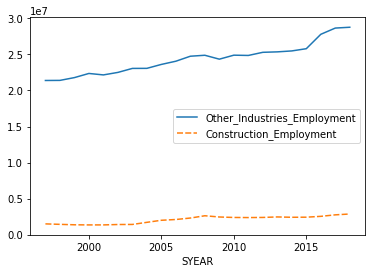

In [332]:
# !pip install seaborn

import seaborn as sns

output_df_cpy = output_df.copy()

other_industries = output_df_cpy[output_df_cpy["LMO_Detailed_Industry"] != 'Construction']
other_industries_summary = other_industries.groupby(["SYEAR"]).sum().drop('SMTH', axis=1)

construction_industry = output_df_cpy[output_df_cpy["LMO_Detailed_Industry"] == 'Construction']
construction_industry_summary = construction_industry.groupby(["SYEAR"]).sum().drop('SMTH', axis=1)

# idx = pd.IndexSlice
# construction = construction_industry_summary.loc[idx[:, ["Construction"]], : ]
construction_industry_summary.rename(columns={'Employment':'Construction_Employment'}, inplace=True)
other_industries_summary.rename(columns={'Employment':'Other_Industries_Employment'}, inplace=True)

combined_summaries = other_industries_summary.merge(construction_industry_summary, left_index=True, right_index=True)
# print(combined_summaries)
sns.lineplot(data=combined_summaries)

### Which industry had the most performance each year and throughout?

In [355]:
idx = output_df_cpy.groupby('SYEAR')['Employment'].idxmax()
print(output_df_cpy.loc[idx].head(22))

       SYEAR  SMTH                              LMO_Detailed_Industry  \
387     1997     7  Other retail trade (excluding cars and persona...   
1390    1998    12  Other retail trade (excluding cars and persona...   
1567    1999     3  Other retail trade (excluding cars and persona...   
2511    2000     7  Other retail trade (excluding cars and persona...   
3455    2001    11  Other retail trade (excluding cars and persona...   
4222    2002    12  Other retail trade (excluding cars and persona...   
4930    2003    12  Other retail trade (excluding cars and persona...   
4989    2004     1  Other retail trade (excluding cars and persona...   
6346    2005    12  Other retail trade (excluding cars and persona...   
6523    2006     3  Other retail trade (excluding cars and persona...   
7703    2007    11  Other retail trade (excluding cars and persona...   
8116    2008     6  Other retail trade (excluding cars and persona...   
9178    2009    12  Other retail trade (excluding c

### How does the employment percentage change look overall?

<AxesSubplot:xlabel='SYEAR'>

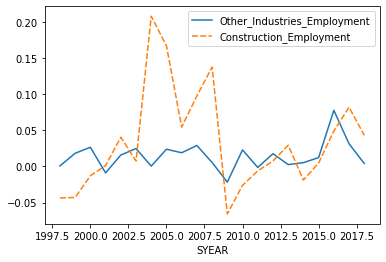

In [352]:
sns.lineplot(data=combined_summaries.pct_change())

### Which Quarter of each year saw the highest employment rate?

<AxesSubplot:>

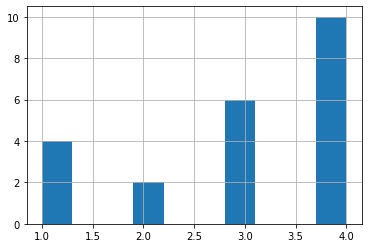

In [416]:
idx = output_df_cpy.groupby('SYEAR')['Employment'].idxmax()
result = output_df_cpy.loc[idx]

def get_quarter(m):
    return (m-1)//3 + 1

result['Qtr'] = result['SMTH'].map(lambda x: get_quarter(x))
result['Qtr'].hist()

### Which Industries has shown the highest employing rate improvement?

<AxesSubplot:xlabel='SYEAR', ylabel='Employment'>

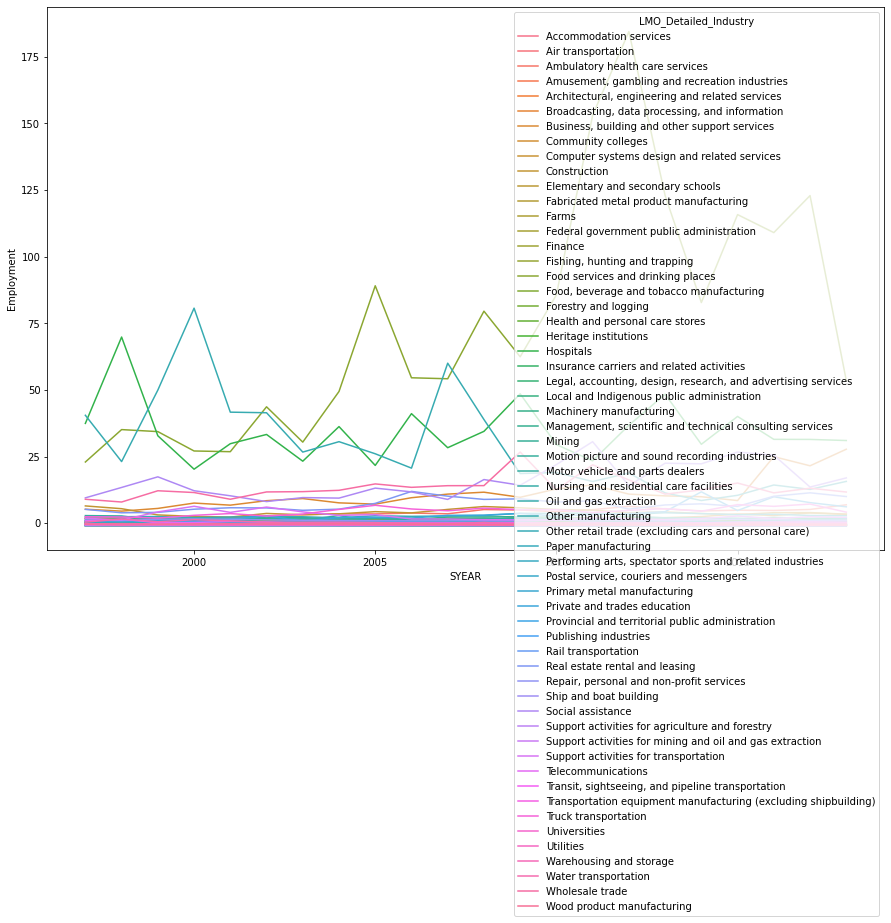

In [454]:
import matplotlib.pyplot as plt
idx = output_df_cpy.groupby('LMO_Detailed_Industry')['Employment'].idxmax()
output_df_cpy.loc[idx]
result = output_df_cpy.groupby(['LMO_Detailed_Industry', 'SYEAR'])['Employment'].sum()
result
# sns.lineplot(x="SYEAR", y=result.pct_change(), data=result, hue="LMO_Detailed_Industry")
plt.figure(figsize=(15,10))
sns.lineplot(x="SYEAR", y=output_df_cpy['Employment'].pct_change(), hue="LMO_Detailed_Industry", data=output_df_cpy, ci=None)